<p style="color:#FFF; background:#800000; padding:12px; font-size:20px; font-style:italic; text-align:center">
  <span style="width:33%; display:inline-block; text-align:left">BAILLET Benjamin</span>
  <span style="width:33%; display:inline-block; text-align:center">MILLOT Alexandra</span>
  <span style="width:33%; display:inline-block; text-align:right">EL HABTI Badr</span><br>
  <span style="font-size:48px; font-style:normal"><b>Data Challenge</b></span><br>
  <span style="width:49%; display:inline-block; text-align:left">Organisé par la Caisse des Dépôts (CDC)</span>
  <span style="width:49%; display:inline-block; text-align:right">Master IREF</span>
</p>

<h2 style="padding:16px; color:#FFF; background:#800000"> Introduction</h2>

Dans le cadre d’un chantier de scoring des risques physiques liés au changement climatique, la Caisse des Dépôts (CDC) propose un défi aux participants visant à évaluer la vulnérabilité d’un portefeuille fictif d’actifs localisés en France métropolitaine. L’objectif principal est d’élaborer une méthode robuste de mesure et de représentation des risques climatiques, intégrant des indicateurs pertinents et des outils d’analyse géospatiale.

**Objectifs du challenge:**

1) Mesurer les risques physiques associés à quatre principaux aléas climatiques :
- Sécheresse/stress hydrique.
- Inondations fluviales.
- Feux de forêts.
- Vagues de chaleur.

Une question bonus propose également de prendre en compte l’érosion côtière.

2) Élaborer une stratégie de scoring permettant de quantifier la vulnérabilité des contreparties, même dans le cas de multiples localisations.

3) Restituer les résultats sous forme de rapports et d’outils visuels, tels que des cartes géographiques et des agrégations au niveau du portefeuille.

**Méthodologie et outils**
Les participants doivent intégrer des données issues de plateformes spécialisées :
- IGN (localisation précise des actifs) pour des **cartes**
- DRIAS (projections climatiques) pour les **données (excel)** 
- Georisques (cartes de risques d’inondations) pour des **cartes**
- CORINE LAND COVER (analyse des zones forestières) pour les **données (excel)**
  
Utilisation recommandée de QGIS, un logiciel de cartographie libre, pour effectuer des analyses vectorielles, des jointures spatiales et exporter des résultats visuels.

**Indicateurs clés à analyser**
Le scoring doit inclure divers indicateurs climatiques, tels que :
- Précipitations moyennes annuelles et jours de fortes précipitations.
- Températures extrêmes (vagues de chaleur/froid).
- Indicateurs de sécheresse (jours consécutifs avec précipitations <1mm).
- Indice de risque météorologique des feux de forêts.
- Evolution des vents forts et des submersions côtières.

**Modalités pratiques**
Un portefeuille fictif est fourni, contenant :
- Identifiants des contreparties.
- Localisation et montant des financements.
- Secteurs d’activité et maturité des actifs.

<h2 style="padding:16px; color:#FFF; background:#800000;">Approche pour une l'évaluation des risques climatiques</h2>


### Nous travaillons dans la suite de ce projet avec les données issues du site DRIAS

**Étape 1 : Extraction et préparation des données**

1) **Utilisation des indicateurs DRIAS**

Extraire les données géographiques des indicateurs climatiques :
- Sécheresse.
- Inondations.
- Feux de forêt.
- Vagues de chaleur.

Associer chaque ville aux données climatiques les plus proches en utilisant l’outil QGIS (analyses par jointures géographiques).

2) **Segmentation temporelle**
   
Travailler sur trois horizons temporels : 
- **H1: 2021-2050**
- **H2: 2051-2070**
- **H3: 2071-2100**

La période de référence est **2006-2100**


**Étape 2 : Calcul des scores climatiques pour chaque ville**

1) **Établir un score pour chaque risque :**
- Normaliser les indicateurs climatiques pour assurer leur comparabilité.
- Appliquer une méthode de clustering K-means pour regrouper les villes présentant des profils similaires.

2) **Score final pour chaque risque :**
- Pondérer les indicateurs normalisés selon leur importance relative.
- Classer les scores finaux en trois catégories via des quantiles (exemple : résilient, intermédiaire, exposé).

**Étape 3 : Couplage des scores climatiques et sectoriels**

1) **Score sectoriel**
- Classer les secteurs d'activité en fonction de leur vulnérabilité au climat :
    - Pour les indicateurs Sécheresse, Vagues de chaleur: **score de 0 à 2**
    - Pour l'indicateur Feux de fôrets, Inondations: **score de 0 à 3**

2) **Score géographique**
- Assigner à chaque commune un score agrégé pour les quatre risques climatiques, différencié selon les horizons H1, H2, et H3.
- L’horizon temporel est ajusté selon la maturité des actifs financés.

**Étape 4 : Calcul des scores pour le portefeuille**

1) **Pour chaque ligne d’actif :**
   
Combiner les **scores sectoriels et géographiques** :
- Attribuer un score géographique selon la localisation et l’horizon temporel correspondant.
- Pondérer par le montant de l’encours (valeur de financement).

2) **Pour chaque contrepartie :**
- Agréger les scores des différents actifs associés à une contrepartie.
- Pondérer le score global par l’exposition financière relative (part des encours dans le portefeuille total).

3) **Pour le portefeuille global**

**Etape 5: Synthèse et restitution**
- Observer les évolutions des indicateurs dans le temps à travers des cartes
- Le résultat final consiste en une cartographie des risques climatiques des actifs et des contreparties.
- La visualisation inclura des rapports agrégés par portefeuille, horizon temporel et localisation, pour guider les décisions stratégiques.

<h2 style="padding:16px; color:#FFF; background:#800000"> Analyse des données</h2>

In [7]:
# Librairies

import numpy as np # Pour les calculs numériques
from scipy import stats # Pour des fonctions statistiques avancées
from tabulate import tabulate # Pour faire des tableaux

import pandas as pd # Pour la manipulation de données
from sklearn.preprocessing import StandardScaler # Pour normaliser les données
from sklearn.cluster import KMeans # Pour la segmentation des données en clusters

import matplotlib.pyplot as plt # Pour la création de visualisations graphiques
import seaborn as sns # Pour des visualisations plus esthétiques basées sur matplotlib
import geopandas as gpd # Pour la cartographie

import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

# Ignorer tous les avertissements
import warnings
warnings.filterwarnings('ignore')

Nous travaillons avec les données issues de **DRIAS**

In [9]:
df_drias = pd.read_csv("DRIAS/indices_projets_communes.csv", encoding='utf-8')
df_drias

fid                        ID                  NOM  \
0            1  COMMUNE_0000000009750662     Villy-le-Pelloux   
1            2  COMMUNE_0000000009750662     Villy-le-Pelloux   
2            3  COMMUNE_0000000009750662     Villy-le-Pelloux   
3            4  COMMUNE_0000000009747703              Antully   
4            5  COMMUNE_0000000009747703              Antully   
...        ...                       ...                  ...   
106057  106058  COMMUNE_0000000009755155  Mauzens-et-Miremont   
106058  106059  COMMUNE_0000000009755155  Mauzens-et-Miremont   
106059  106060  COMMUNE_0000000009761256             Sénarens   
106060  106061  COMMUNE_0000000009761256             Sénarens   
106061  106062  COMMUNE_0000000009761256             Sénarens   

                      NOM_M INSEE_COM          STATUT  POPULATION INSEE_CAN  \
0          VILLY-LE-PELLOUX     74307  Commune simple         995        11   
1          VILLY-LE-PELLOUX     74307  Commune simple         995        11   
2          VILLY-LE-PELLOUX     74307  Commune simple         995        11   
3                   ANTULLY     71010  Commune simple         869        02   
4                   ANTULLY     71010  Commune simple         869        02   
...                     ...       ...             ...         ...       ...   
106057  MAUZENS-ET-MIREMONT     24261  Commune simple         284        25   
106058  MAUZENS-ET-MIREMONT     24261  Commune simple         284        25   
106059             SENARENS     31543  Commune simple         118        06   
106060             SENARENS     31543  Commune simple         118        06   
106061             SENARENS     31543  Commune simple         118        06   

        INSEE_ARR INSEE_DEP  ...    NORRR NORPXCWD  NORPXCDD  NORTPSPI  n  \
0               3        74  ...  1373.39        9        21      0.03  1   
1               3        74  ...  1370.45        9        22      0.05  2   
2               3        74  ...  1366.91        9        20      0.03  3   
3               1        71  ...   998.62        9        20      0.03  1   
4               1        71  ...   975.90        9        19      0.05  2   
...           ...       ...  ...      ...      ...       ...       ... ..   
106057          4        24  ...   862.56        8        28      0.10  2   
106058          4        24  ...   890.11        9        24      0.05  3   
106059          1        31  ...   723.87        7        24      0.08  1   
106060          1        31  ...   642.29        6        30      0.21  2   
106061          1        31  ...   702.50        7        26      0.08  3   

           distance      feature_x     feature_y      nearest_x     nearest_y  
0       2329.927060  942033.100000  6.550392e+06  940468.904996  6.552119e+06  
1       2329.927060  942033.100000  6.550392e+06  940468.904996  6.552119e+06  
2       2329.927060  942033.100000  6.550392e+06  940468.904996  6.552119e+06  
3        835.708226  806138.800000  6.641460e+06  805343.409637  6.641204e+06  
4        835.708226  806138.800000  6.641460e+06  805343.409637  6.641204e+06  
...             ...            ...           ...            ...           ...  
106057   356.002004  539548.390054  6.435821e+06  539837.754580  6.435614e+06  
106058   356.002004  539548.390054  6.435821e+06  539837.754580  6.435614e+06  
106059   802.042122  537766.756890  6.251224e+06  538310.484566  6.251814e+06  
106060   802.042122  537766.756890  6.251224e+06  538310.484566  6.251814e+06  
106061   802.042122  537766.756890  6.251224e+06  538310.484566  6.251814e+06  

[106062 rows x 30 columns]

**On vérifie s'il y a des valeurs manquantes**

In [11]:
# Vérification et affichage des valeurs manquantes
missing_values = df_drias.isnull().sum()
total_nan = missing_values.sum()

print(missing_values)
print(f"\nTotal des NaN dans le DataFrame : {total_nan}")

fid           0
ID            0
NOM           0
NOM_M         0
INSEE_COM     0
STATUT        0
POPULATION    0
INSEE_CAN     0
INSEE_ARR     0
INSEE_DEP     0
INSEE_REG     0
SIREN_EPCI    0
Point         0
Latitude      0
Longitude     0
Contexte      0
P�riode       0
NORTXAV       0
NORTX35       0
NORTXHWD      0
NORRR         0
NORPXCWD      0
NORPXCDD      0
NORTPSPI      0
n             0
distance      0
feature_x     0
feature_y     0
nearest_x     0
nearest_y     0
dtype: int64

Total des NaN dans le DataFrame : 0


In [15]:
# Recherche et affichage du nombre de doublons
num_duplicates = df_drias.duplicated().sum()
print(f"Nombre de doublons : {num_duplicates}")

Nombre de doublons : 0


In [17]:
df_drias = df_drias.drop(['ID', 'NOM_M', 'STATUT', 'POPULATION', 'INSEE_CAN', 'INSEE_ARR', 'INSEE_DEP', 
                          'INSEE_REG', 'SIREN_EPCI', 'Point', 'Latitude', 'Longitude', 'Contexte', 'n', 
                          'distance', 'feature_x', 'feature_y', 'nearest_x' ,'nearest_y', 'fid'],axis=1)
df_drias

NOM INSEE_COM P�riode  NORTXAV  NORTX35  NORTXHWD  \
0          Villy-le-Pelloux     74307      H2    15.51     2.51        53   
1          Villy-le-Pelloux     74307      H3    17.52     8.82       104   
2          Villy-le-Pelloux     74307      H1    14.59     1.19        35   
3                   Antully     71010      H2    15.27     3.12        42   
4                   Antully     71010      H1    14.29     1.42        27   
...                     ...       ...     ...      ...      ...       ...   
106057  Mauzens-et-Miremont     24261      H3    20.65    16.35        78   
106058  Mauzens-et-Miremont     24261      H2    18.81     6.92        42   
106059             Sénarens     31543      H1    17.74     4.67        21   
106060             Sénarens     31543      H3    20.65    18.88        75   
106061             Sénarens     31543      H2    18.81     8.10        37   

          NORRR  NORPXCWD  NORPXCDD  NORTPSPI  
0       1373.39         9        21      0.03  
1       1370.45         9        22      0.05  
2       1366.91         9        20      0.03  
3        998.62         9        20      0.03  
4        975.90         9        19      0.05  
...         ...       ...       ...       ...  
106057   862.56         8        28      0.10  
106058   890.11         9        24      0.05  
106059   723.87         7        24      0.08  
106060   642.29         6        30      0.21  
106061   702.50         7        26      0.08  

[106062 rows x 10 columns]

**On renomme les colonnes qui nous intéressent**

In [20]:
df_drias.columns = ['nom', # Nom de la commune
                    'insee', # Code INSEE commune
                    'periode', # Période/horizon de temps
                    'temp_max', # Température maximale (°C)
                    'nj_f_chal', # Nombre de jours de forte chaleur
                    'nj_vdc', # Nombre de jour d'une vague de chaleur
                    'prec_cumul', # Cumul de précipitation (mm)
                    'max_jourpluie_cons', # Nombre maximum de jours de pluie consécutifs
                    'sech', # Période de sécheresse (jours)
                    'temps_sech', # Temps passé en sécheresse météorologique (%)
                   ]
df_drias

nom  insee periode  temp_max  nj_f_chal  nj_vdc  \
0          Villy-le-Pelloux  74307      H2     15.51       2.51      53   
1          Villy-le-Pelloux  74307      H3     17.52       8.82     104   
2          Villy-le-Pelloux  74307      H1     14.59       1.19      35   
3                   Antully  71010      H2     15.27       3.12      42   
4                   Antully  71010      H1     14.29       1.42      27   
...                     ...    ...     ...       ...        ...     ...   
106057  Mauzens-et-Miremont  24261      H3     20.65      16.35      78   
106058  Mauzens-et-Miremont  24261      H2     18.81       6.92      42   
106059             Sénarens  31543      H1     17.74       4.67      21   
106060             Sénarens  31543      H3     20.65      18.88      75   
106061             Sénarens  31543      H2     18.81       8.10      37   

        prec_cumul  max_jourpluie_cons  sech  temps_sech  
0          1373.39                   9    21        0.03  
1          1370.45                   9    22        0.05  
2          1366.91                   9    20        0.03  
3           998.62                   9    20        0.03  
4           975.90                   9    19        0.05  
...            ...                 ...   ...         ...  
106057      862.56                   8    28        0.10  
106058      890.11                   9    24        0.05  
106059      723.87                   7    24        0.08  
106060      642.29                   6    30        0.21  
106061      702.50                   7    26        0.08  

[106062 rows x 10 columns]

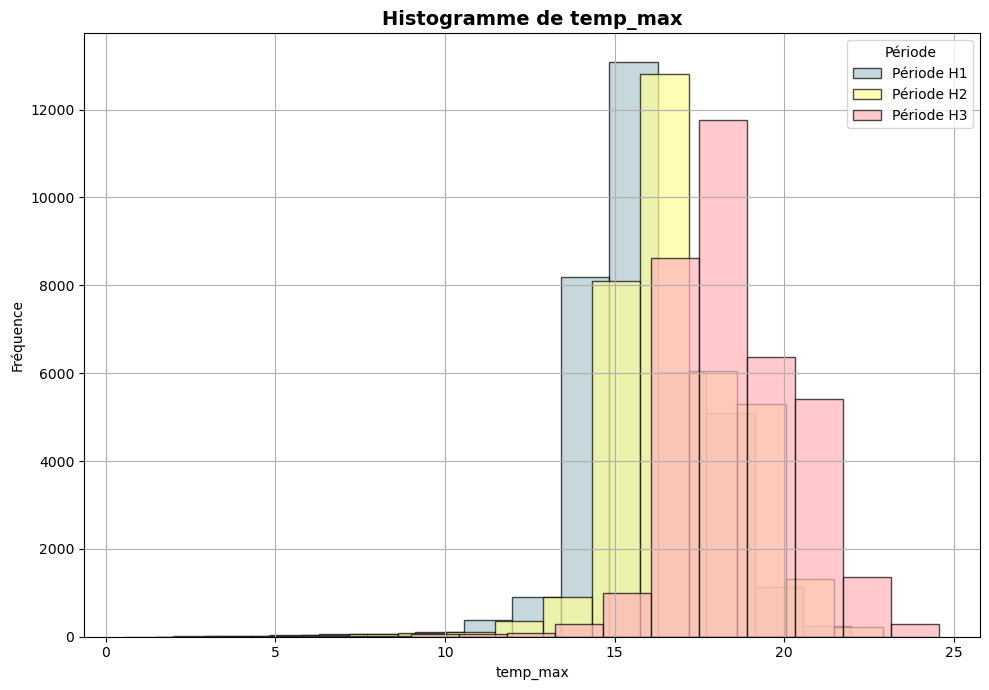

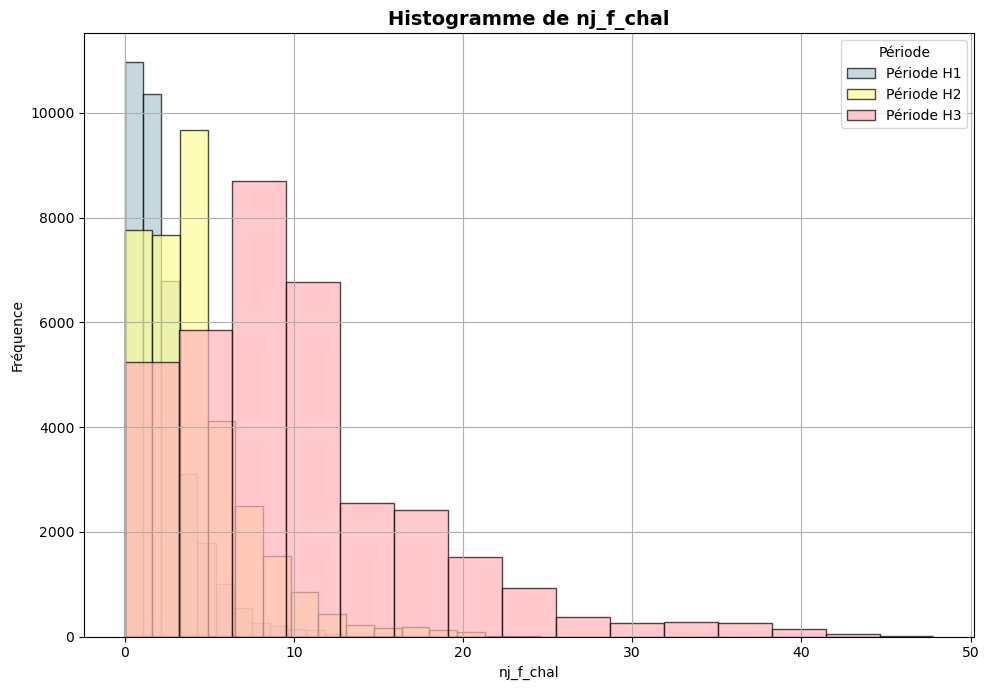

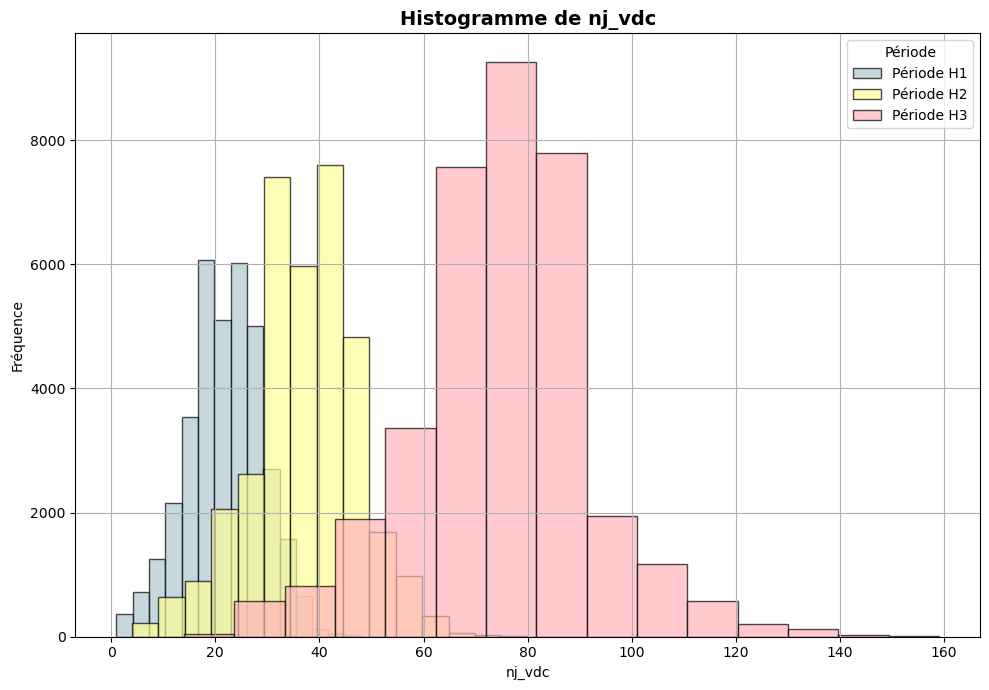

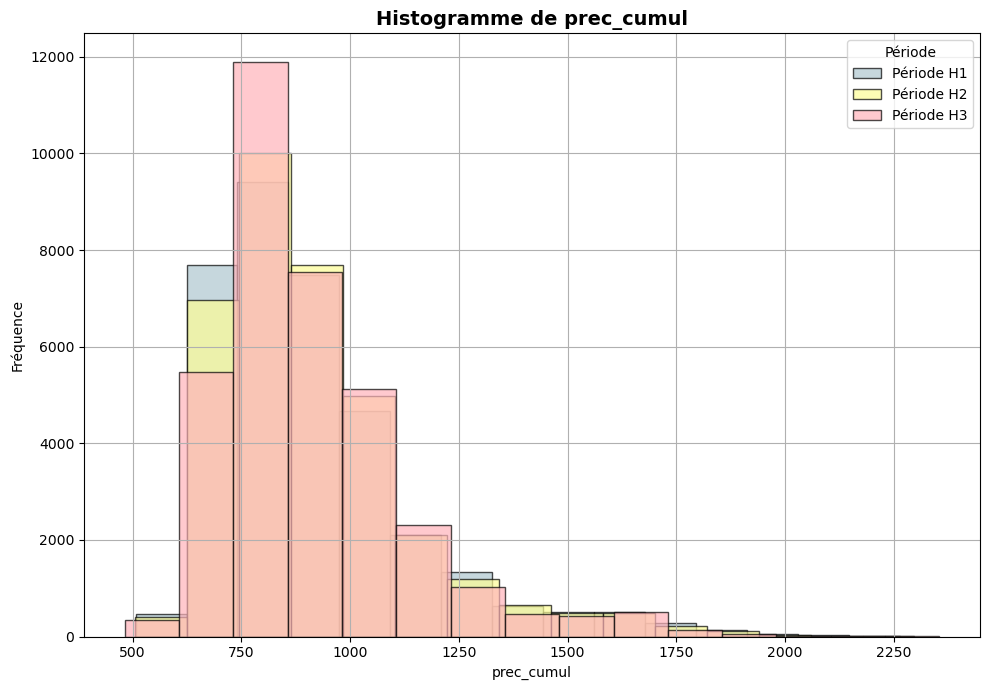

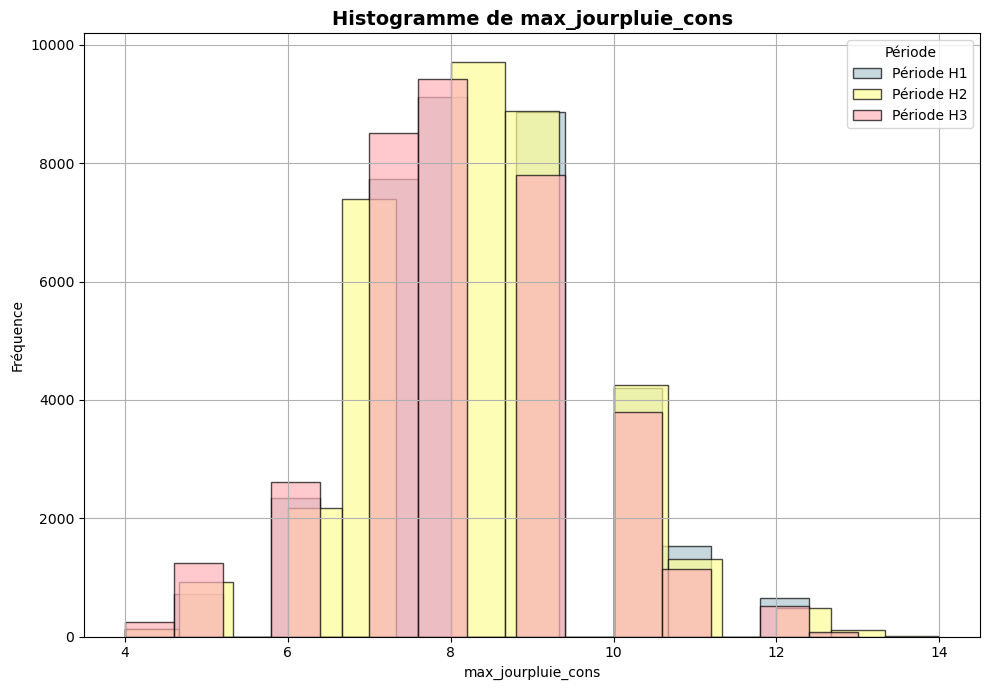

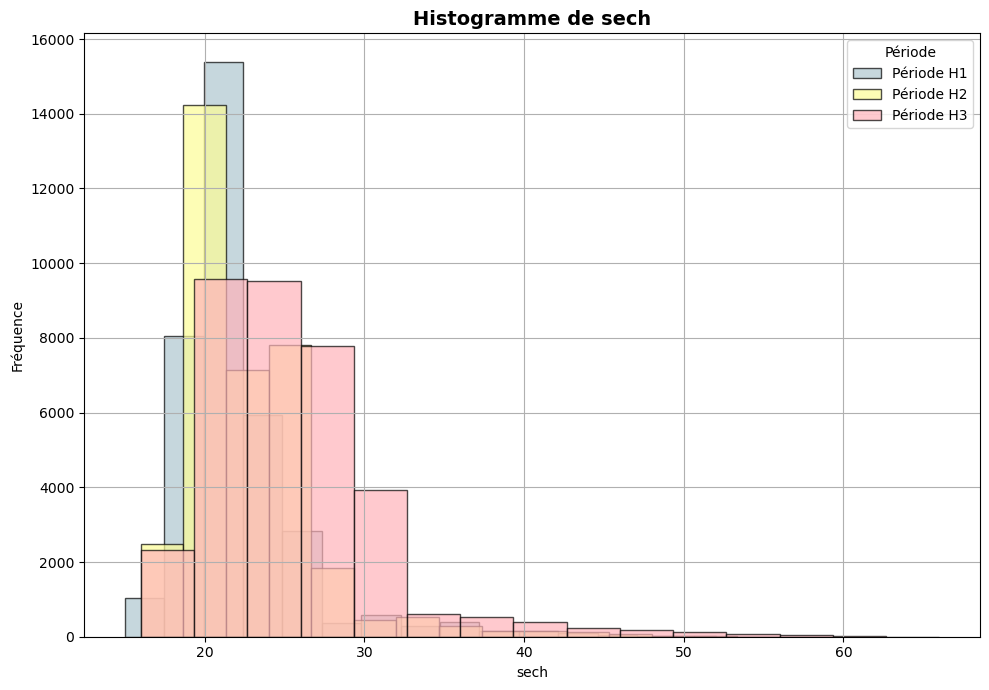

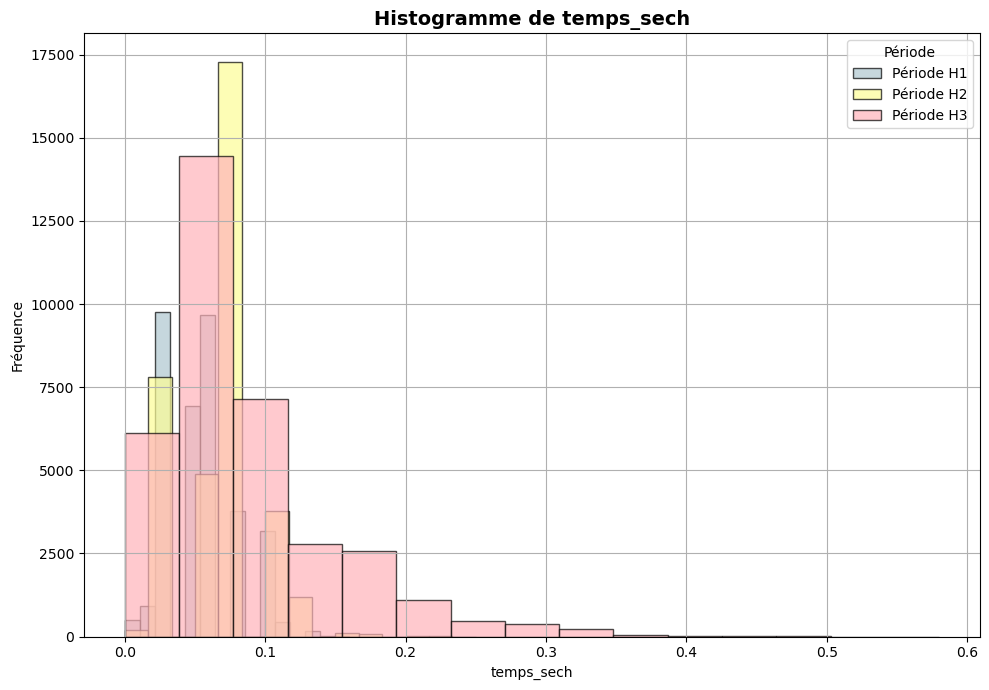

In [22]:
colors = ['#AEC6CF', '#FDFD96', '#FFB3BA']  # Couleurs pour H1, H2, H3

for i, col in enumerate(df_drias.columns[3:]):
    fig, ax = plt.subplots(figsize=(10, 7))
    for j, (key, group) in enumerate(df_drias.groupby('periode')):
        group[col].hist(ax=ax, label=f"Période {key}", color=colors[j], edgecolor='black', bins=15, alpha=0.7)
    ax.set_title(f'Histogramme de {col}', fontsize=14, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Fréquence')
    ax.legend(title='Période', loc='best')
    plt.tight_layout()
    plt.show()

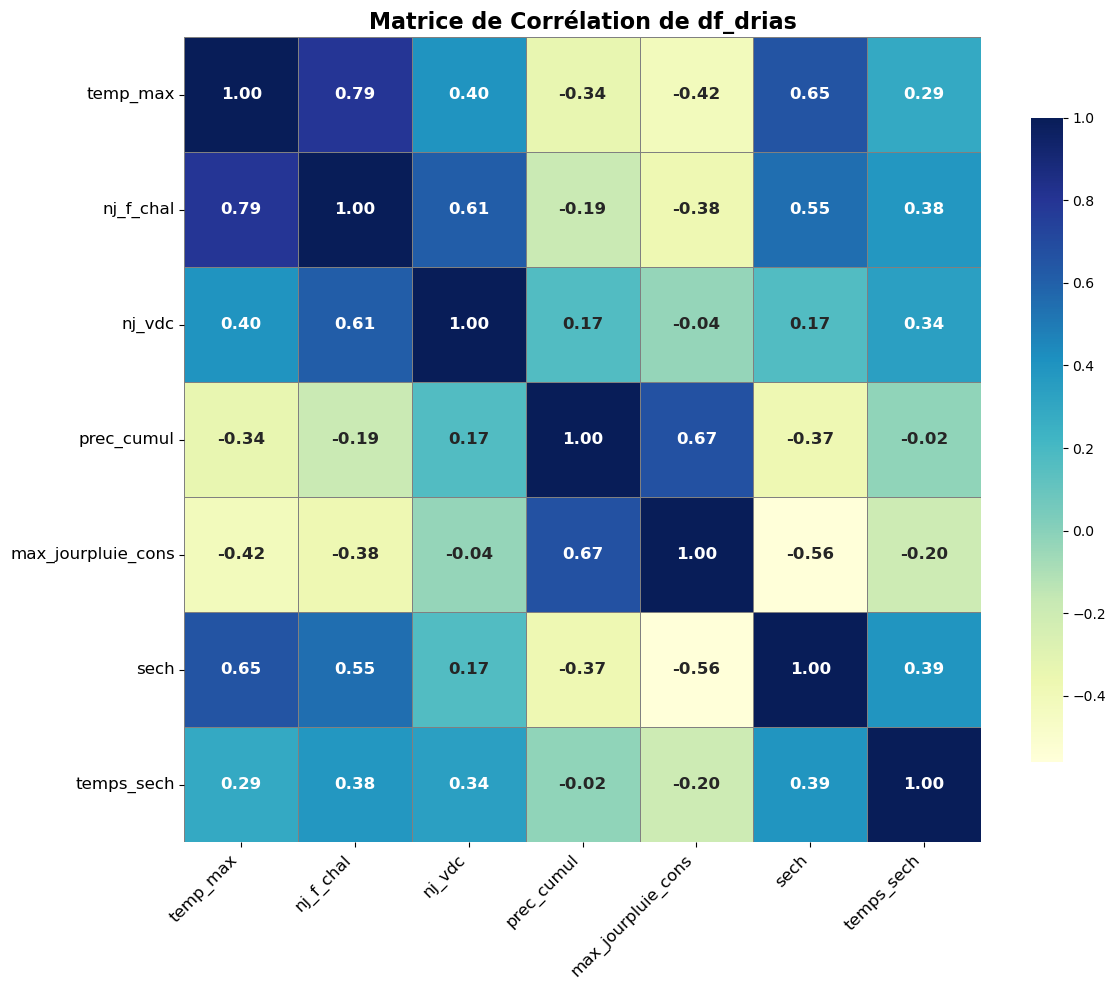

In [23]:
# Matrice de corrélation et heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_drias.iloc[:, 3:].corr(), annot=True, cmap='YlGnBu', fmt=".2f", 
            annot_kws={"size": 12, "weight": "bold"}, cbar_kws={"shrink": 0.8}, 
            linewidths=0.5, linecolor='gray')

plt.title('Matrice de Corrélation de df_drias', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

<h2 style="padding:16px; color:#FFF; background:#800000"> 1) Sécheresse</h2>

Les variables `sech` (période de sécheresse en jours) et `temps_sech` (temps passé en sécheresse météorologique en pourcentage) ont été sélectionnées pour leur complémentarité dans la caractérisation des phénomènes de sécheresse. 

D'une part, la variable `sech` fournit une mesure absolue en jours, ce qui est essentiel pour quantifier la gravité et la durée réelle des épisodes de sécheresse. 

D'autre part, la variable `temps_sech` exprime la proportion de temps affecté par des conditions de sécheresse en pourcentage. Cet indicateur est particulièrement adapté pour évaluer la prévalence des sécheresses.

Ensemble, ces deux variables offrent une représentation complète et équilibrée du phénomène.


---

Pour évaluer les risques climatiques, nous allons regrouper plusieurs variables liées à un même phénomène en un score unique. Cette approche permet de:
- simplifier l’interprétation
- faciliter les comparaisons entre régions ou périodes

Nous allons créer des scores uniques pour les quatre indicateurs suivants :
1. Sécheresse.
2. Inondations.
3. Feux de forêt.
4. Vagues de chaleur.

---

### Méthodologie 

La démarche suivie pour chaque indicateur pour obtenir un score unique se décline en plusieurs étapes est la suivante :
1. **Choix des colonnes** : Identifier les variables pertinentes qui reflètent différents aspects du phénomène étudié.
2. **Normalisation des données** : Ajuster les variables pour qu’elles soient sur une même échelle et puissent contribuer équitablement.
3. **Calcul ou regroupement** : Appliquer une méthode des K-means pour regrouper les observations ou combiner les variables en un seul indicateur.
4. **Ajout au tableau** : Intégrer le score calculé comme une nouvelle colonne dans le tableau principal.

---

### Indicateurs Climatiques

#### Sécheresse
Les colonnes sélectionnées pour cet indicateur sont le nombre de jours de sécheresse (`sech`) et le nombre de jours de forte chaleur(`nj_f_chal`).  

#### Inondations
Pour les inondations, trois colonnes sont utilisées : les précipitations cumulées (`prec_cumul`), le nombre maximal de jours consécutifs de pluie (`max_jourpluie_cons`), et un indicateur du risque d’inondation (`inond`). Ces variables permettent de mesurer la quantité totale de pluie, la persistance des épisodes pluvieux, ainsi que des facteurs géographiques spécifiques au risque d’inondation.

#### Feux de forêt
Les colonnes retenues sont la température maximale (`temp_max`), les précipitations cumulées (`prec_cumul`), et un indice météorologique lié aux feux de forêt (`indice_feu`). Ce choix reflète les conditions climatiques favorisant les incendies tout en prenant en compte des éléments atténuants comme la quantité de pluie.

#### Vagues de chaleur
Cet indicateur s’appuie sur deux variables : le nombre de jours de forte chaleur (`nj_f_chal`) et le nombre de jours dans une vague de chaleur (`nj_vdc`). Elles permettent d’évaluer l’intensité des journées chaudes et la durée des vagues de chaleur, offrant ainsi une mesure complète des épisodes de chaleur extrême.

### Intérêt de regrouper les colonnes 

1. **Clarté** : Regrouper plusieurs colonnes en un score unique rend les données plus faciles à analyser et à comparer.
2. **Équité** : La normalisation garantit que chaque variable contribue de manière égale, évitant qu’une variable domine les autres à cause de son échelle.
3. **Pertinence** : En combinant plusieurs aspects d’un même phénomène, on obtient une mesure globale qui reflète mieux la réalité.

La création de scores uniques pour chaque indicateur climatique permet de simplifier l’interprétation tout en conservant la richesse et la diversité des données initiales. 


In [29]:
# Les colonnes qui nous intéressent 
sech = df_drias[['sech', 'nj_f_chal']]
sech

sech  nj_f_chal
0         21       2.51
1         22       8.82
2         20       1.19
3         20       3.12
4         19       1.42
...      ...        ...
106057    28      16.35
106058    24       6.92
106059    24       4.67
106060    30      18.88
106061    26       8.10

[106062 rows x 2 columns]

## La méthode du coude (Elbow Method)

La **méthode du coude** est une technique utilisée pour déterminer le **nombre optimal de clusters** dans l'algorithme **K-Means**. L'objectif est de calculer l'**inertie** (la somme des distances au carré entre chaque point de données et le centre de son cluster) pour différentes valeurs de **k** (nombre de clusters). Ensuite, on trace l'inertie en fonction du nombre de clusters et l'on cherche le **"coude"** de la courbe, où l'inertie commence à diminuer plus lentement. Ce point indique généralement le **nombre optimal de clusters**.

### Inertie

L'inertie est calculée comme la somme des carrés des distances entre chaque point de données et le **centre** du cluster auquel il appartient. La formule mathématique de l'inertie pour un jeu de données de **n** points répartis dans **k** clusters est la suivante :

$$
\text{Inertie} = \sum_{i=1}^{n} \sum_{j=1}^{k} (x_i - c_j)^2
$$

où :
- $n$ est le nombre total de points de données,
- $x_i$ est un point de données,
- $c_j$ est le centre du cluster $j$,
- $(x_i - c_j)^2$ est la distance au carré entre un point de données et le centre du cluster auquel il est affecté.

### Comment ça fonctionne ?

1. **Inertie** :
   L'inertie mesure la **compacité des clusters**. Plus elle est faible, mieux les points sont regroupés autour de leurs centres de clusters. L'objectif de K-Means est de minimiser cette inertie.

2. **Le coude** :
   Le "coude" sur le graphique est l'endroit où la diminution de l'inertie ralentit. Ce point marque le nombre optimal de clusters. Ajouter plus de clusters après ce point n'améliore pas significativement l'inertie.

## Intérêt dans le cadre de notre projet

Dans le cadre de notre projet d'analyse des risques climatiques, la méthode du coude présente plusieurs avantages :

1. **Déterminer le nombre optimal de groupes** :
   Elle permet de trouver combien de groupes (ou clusters) existent naturellement dans nos données climatiques, comme :
   - la **période de sécheresse (`sech`, `nj_f_chal`)**.

2. **Optimisation de l’analyse des données** :
   En identifiant le nombre idéal de clusters, la méthode du coude aide à comprendre la **répartition** des données climatiques. Par exemple, elle pourrait révéler des zones géographiques ou des périodes ayant des **caractéristiques climatiques similaires**, ce qui est essentiel pour analyser les **risques climatiques** et mieux cibler les stratégies d’adaptation.

### Conclusion

La méthode du coude nous aide à organiser nos données climatiques en **groupes significatifs**, rendant l’analyse des risques climatiques plus pertinente et actionable. Elle permet de détecter les **patterns** climatiques naturels et de mieux comprendre les relations entre les différentes variables climatiques.


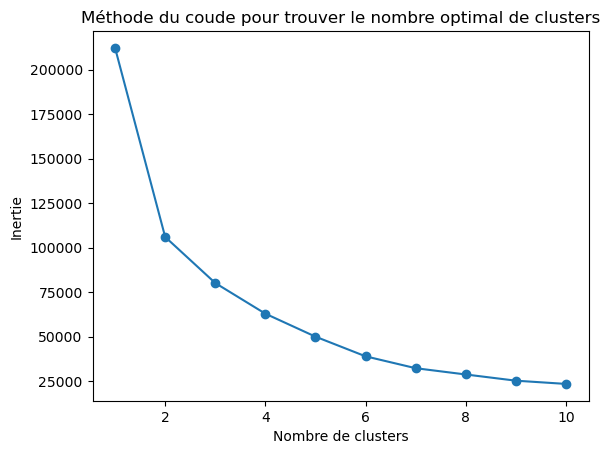

In [32]:
# Normalisation des données
scaler = StandardScaler()
scaled_features = scaler.fit_transform(sech)

# Liste pour enregistrer les valeurs d'inertie
inertia = []

# Test de différents nombres de clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=333)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Tracer le graphique de l'inertie par rapport au nombre de clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour trouver le nombre optimal de clusters')
plt.show()


**On trouve 3 clusters selon la règle du coude**

Centers of clusters:
[[21.03415255  2.65347283]
 [34.24428571 19.58903766]
 [25.77626492  8.43396052]]


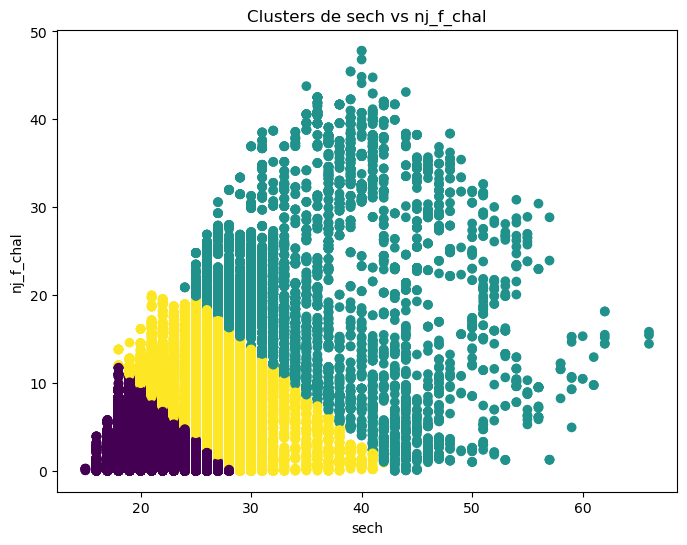

In [35]:
# Appliquer K-Means avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=333)
kmeans.fit(scaled_features)

# Ajouter les labels de cluster au DataFrame
sech['cluster'] = kmeans.labels_

# Afficher les centres des clusters
print("Centers of clusters:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

# Visualisation des clusters
plt.figure(figsize=(8, 6))
plt.scatter(sech['sech'], sech['nj_f_chal'], c=sech['cluster'], cmap='viridis')
plt.title('Clusters de sech vs nj_f_chal')
plt.xlabel('sech')
plt.ylabel('nj_f_chal')
plt.show()


## **Interprétation des résultats**

### Centres des clusters

Les **centres des clusters** sont représentés ci-dessous.  
Chaque ligne correspond à un **cluster** :

- La première colonne représente la **moyenne des valeurs** de la variable `sech` (probablement un indicateur de sécheresse).
- La deuxième colonne représente la **moyenne des valeurs** de la variable `nj_f_chal` (le nombre de jours de forte chaleur).

### **Description des clusters**

#### **Cluster 1**
- `sech` moyen : **21.03**  
  Les points de ce cluster ont en moyenne une valeur modérée de l'indicateur `sech`.
- `nj_f_chal` moyen : **2.65**  
  Les points de ce cluster ont en moyenne un faible nombre de jours de forte chaleur.

#### **Cluster 2**
- `sech` moyen : **34.24**  
  Les points de ce cluster présentent une valeur élevée de l'indicateur `sech`.
- `nj_f_chal` moyen : **19.59**  
  Les points de ce cluster ont en moyenne un nombre important de jours de forte chaleur.

#### **Cluster 3**
- `sech` moyen : **25.78**  
  Les points de ce cluster ont en moyenne une valeur modérée de l'indicateur `sech`.
- `nj_f_chal` moyen : **8.43**  
  Ce cluster est caractérisé par un nombre moyen de jours de forte chaleur.

### **Conclusion**
- **Cluster 1** : Indicateur de sécheresse modéré avec un faible nombre de jours de forte chaleur.
- **Cluster 2** : Indicateur de sécheresse élevé avec un nombre très important de jours de forte chaleur.
- **Cluster 3** : Indicateur de sécheresse modéré avec un nombre moyen de jours de forte chaleur.


In [38]:
df_drias['secheresse'] = sech['cluster']  # Ajouter la colonne 'secheresse' au DataFrame
df_drias  # Afficher le résultat

nom  insee periode  temp_max  nj_f_chal  nj_vdc  \
0          Villy-le-Pelloux  74307      H2     15.51       2.51      53   
1          Villy-le-Pelloux  74307      H3     17.52       8.82     104   
2          Villy-le-Pelloux  74307      H1     14.59       1.19      35   
3                   Antully  71010      H2     15.27       3.12      42   
4                   Antully  71010      H1     14.29       1.42      27   
...                     ...    ...     ...       ...        ...     ...   
106057  Mauzens-et-Miremont  24261      H3     20.65      16.35      78   
106058  Mauzens-et-Miremont  24261      H2     18.81       6.92      42   
106059             Sénarens  31543      H1     17.74       4.67      21   
106060             Sénarens  31543      H3     20.65      18.88      75   
106061             Sénarens  31543      H2     18.81       8.10      37   

        prec_cumul  max_jourpluie_cons  sech  temps_sech  secheresse  
0          1373.39                   9    21        0.03           0  
1          1370.45                   9    22        0.05           2  
2          1366.91                   9    20        0.03           0  
3           998.62                   9    20        0.03           0  
4           975.90                   9    19        0.05           0  
...            ...                 ...   ...         ...         ...  
106057      862.56                   8    28        0.10           1  
106058      890.11                   9    24        0.05           2  
106059      723.87                   7    24        0.08           0  
106060      642.29                   6    30        0.21           1  
106061      702.50                   7    26        0.08           2  

[106062 rows x 11 columns]

Nous réorganisons maintenant les clusters du moins critique au plus critique.

In [41]:
# Création d'une copie temporaire de la colonne 'secheresse'
secheresse_temp = df_drias['secheresse'].copy()

# Réordonner les clusters par ordre croissant
cluster_mapping = {old: new for new, old in enumerate(
    df_drias.groupby('secheresse')[['sech', 'nj_f_chal']].mean()
    .sort_values(by=['sech', 'nj_f_chal']).index
)}

secheresse_temp = secheresse_temp.map(cluster_mapping)

# Vérifier le résultat sur la copie temporaire
print(secheresse_temp.value_counts().sort_index())

secheresse
0    69044
1    29292
2     7726
Name: count, dtype: int64


### **Explication des clusters**

Les résultats du **K-Means** montrent des regroupements de données basés sur les variables `sech` (sécheresse) et `nj_f_chal` (nombre de jours de forte chaleur). Les indices des clusters sont attribués de manière numérique, où :
- **0** correspond au **Cluster 1**.
- **1** correspond au **Cluster 2**.
- **2** correspond au **Cluster 3**.

### **Les clusters seront réorganisés comme suit :**

- **Cluster 0** : Faible sécheresse et faible chaleur.
- **Cluster 1** : Sécheresse modérée et chaleur modérée.
- **Cluster 2** : Sécheresse élevée et chaleur importante.

### **Conclusion**

Les trois clusters identifiés par l'algorithme **K-Means** reflètent différentes intensités de sécheresse et de chaleur associée :
- **Cluster 1** : Sécheresse modérée ou peu fréquente avec un faible nombre de jours de forte chaleur.
- **Cluster 2** : Sécheresse modérée à fréquente avec un nombre moyen de jours de forte chaleur.
- **Cluster 3** : Sécheresse sévère et prolongée avec un nombre élevé de jours de forte chaleur.

Ces résultats permettent de mieux comprendre les zones et périodes nécessitant des interventions adaptées pour la gestion des ressources en eau, la prévention des risques liés à la sécheresse, et la planification agricole.


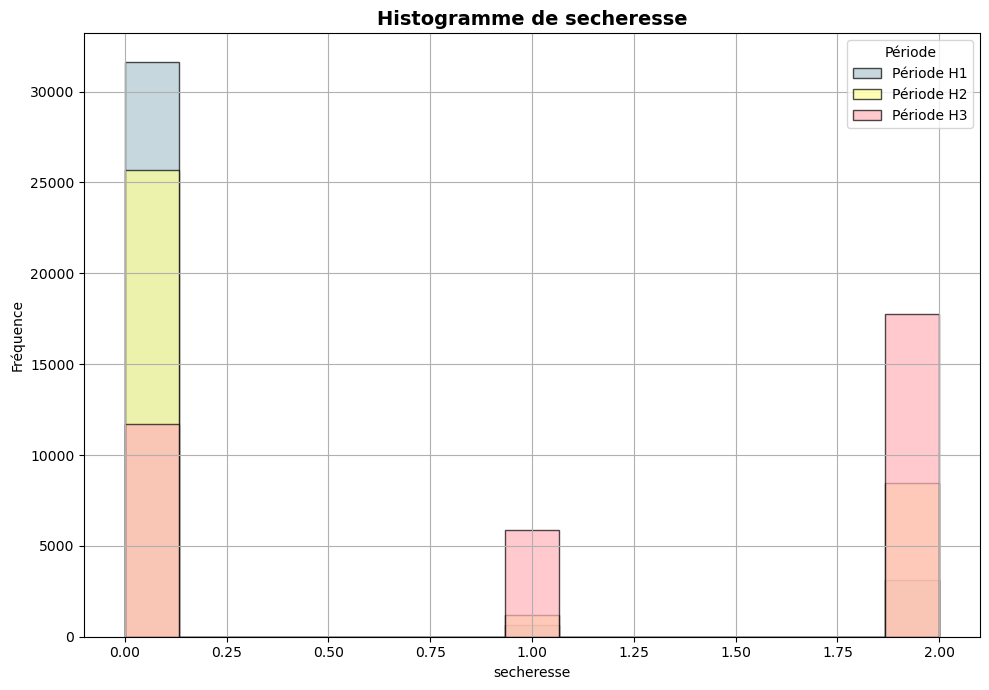

In [44]:
# Définition des couleurs pour les périodes
colors = ['#AEC6CF', '#FDFD96', '#FFB3BA']  # H1: Bleu, H2: Jaune, H3: Rouge
col = "secheresse"  # Colonne à analyser

# Création de la figure pour l'histogramme
fig, ax = plt.subplots(figsize=(10, 7))

# Vérifier l'existence de la colonne et grouper par 'periode'
if 'periode' in df_drias.columns:
    for j, (key, group) in enumerate(df_drias.groupby('periode')):  # Assurez-vous que 'periode' est valide
        group[col].hist(alpha=0.7, ax=ax, label=f"Période {key}", color=colors[j], edgecolor='black', bins=15)

    # Personnalisation du graphique
    ax.set_title(f'Histogramme de {col}', fontsize=14, fontweight='bold')  # Titre
    ax.set_xlabel(col)  # Label de l'axe X
    ax.set_ylabel('Fréquence')  # Label de l'axe Y
    ax.legend(title='Période')  # Légende
    plt.tight_layout()  # Ajustement de l'espacement
    plt.show()  # Affichage du graphique
else:
    print("La colonne 'periode' n'existe pas dans df_drias.")

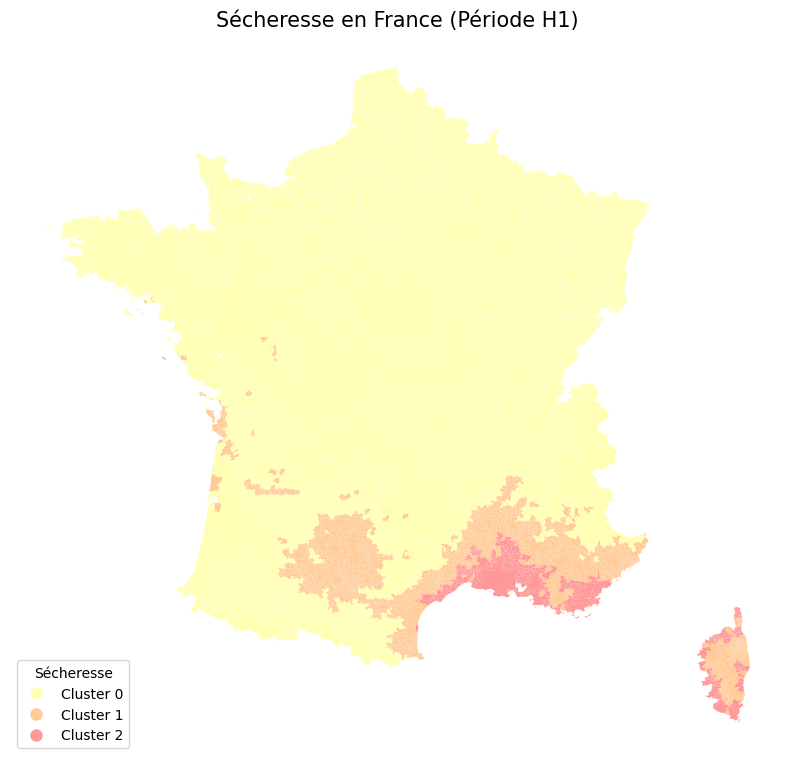

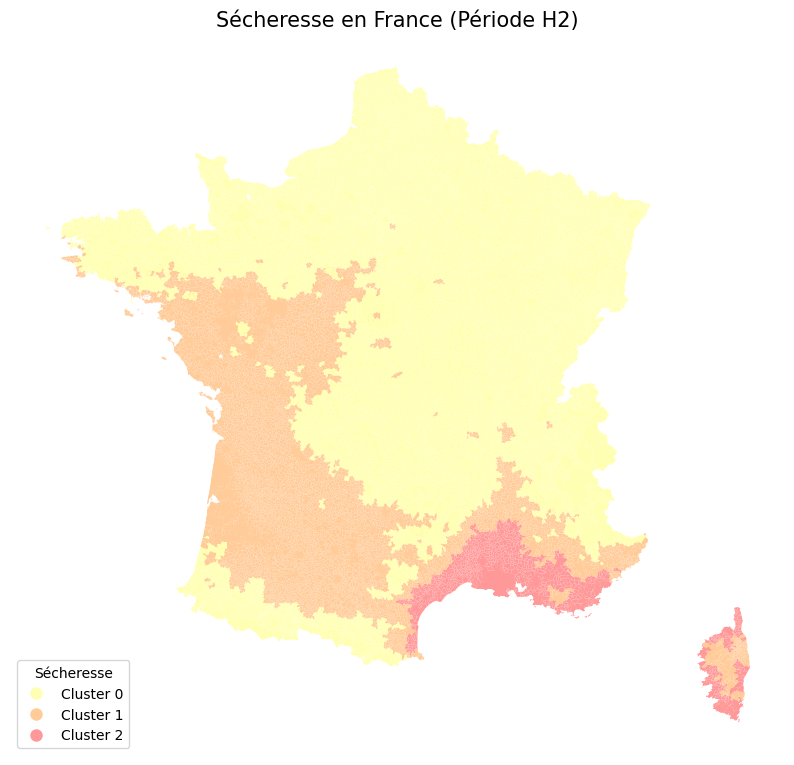

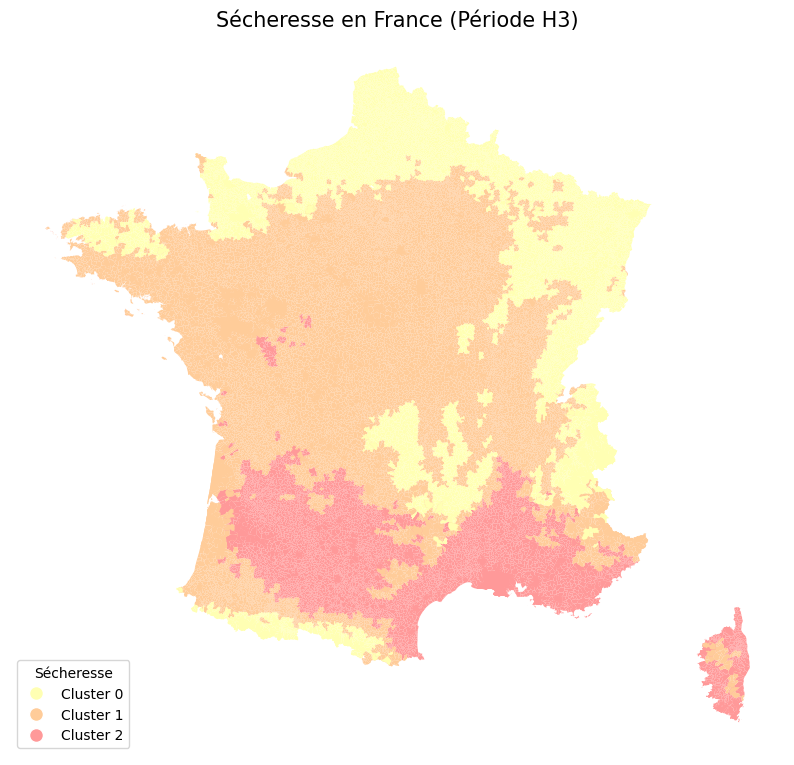

In [1096]:
# Fonction pour afficher une carte pour une période donnée
def plot_secheresse_map(period, commune_map):
    period_data = commune_map[commune_map["periode"] == period]  # Filtrer par période
    
    # Définir les couleurs pour les clusters organisés
    color_map = {0: '#ffffb3', 1: '#ffcc99', 2: '#ff9999'}  # Couleurs pour les clusters triés
    if not set(period_data['secheresse']).issubset(color_map.keys()):
        print(f"Avertissement : certains clusters ne sont pas dans le color_map. Vérifiez les clusters.")
    
    # Attribuer les couleurs selon les clusters
    period_data['color'] = period_data['secheresse'].map(color_map).fillna('#d3d3d3')  # Couleur grise par défaut

    # Tracer la carte
    fig, ax = plt.subplots(figsize=(10, 10))
    period_data.plot(ax=ax, color=period_data['color'])
    ax.set_title(f"Sécheresse en France (Période {period})", fontsize=15)
    ax.axis('off')

    # Légende
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {score}')
                      for score, color in color_map.items()]
    ax.legend(handles=legend_handles, loc='lower left', title="Sécheresse")
    plt.show()

try:
    # Charger et préparer les données
    commune_map = gpd.read_file("qgis/COMMUNE.shp")  # Charger le shapefile
    commune_map["INSEE_COM"] = commune_map["INSEE_COM"].astype(str)
    df_drias["insee"] = df_drias["insee"].astype(str)
    df_drias['secheresse'] = secheresse_temp  # Remplacer par les clusters organisés

    # Fusionner les données des communes avec les clusters
    commune_map = commune_map.merge(df_drias, left_on="INSEE_COM", right_on="insee")  
except Exception as e:
    print(f"Erreur lors du chargement ou de la préparation des données : {e}")

# Générer les cartes pour les périodes H1, H2 et H3
for period in ["H1", "H2", "H3"]:
    try:
        plot_secheresse_map(period, commune_map)
    except Exception as e:
        print(f"Erreur lors de la génération de la carte pour la période {period} : {e}")


<h2 style="padding:16px; color:#FFF; background:#800000"> 2) Inondations</h2>

Les variables `prec_cumul` (cumul de précipitations en millimètres), `max_jourpluie_cons` (nombre maximum de jours consécutifs de pluie) et `sech` (période de sécheresse en jours) ont été choisies pour leur pertinence dans l’analyse des risques liés aux inondations. Ces variables permettent d’évaluer différents aspects complémentaires de ce phénomène climatique.

La variable `prec_cumul` mesure la quantité totale de précipitations sur une période donnée. Cet indicateur est crucial pour estimer le potentiel d'accumulation d'eau et les risques associés, comme les débordements de cours d’eau ou les saturations des sols, qui peuvent entraîner des inondations.

La variable `max_jourpluie_cons` capture la durée des épisodes de pluie consécutifs. Une période prolongée de précipitations peut significativement augmenter les risques d’inondation, même si le cumul total reste modéré. Cet indicateur est donc essentiel pour analyser la temporalité des épisodes pluvieux et leur impact.

la variable `sech` fournit une mesure absolue en jours, ce qui est essentiel pour quantifier la gravité et la durée réelle des épisodes de sécheresse. 

In [46]:
# Les colonnes qui nous intéressent 
inondation = df_drias[['prec_cumul', 'max_jourpluie_cons', 'sech']]
inondation

prec_cumul  max_jourpluie_cons  sech
0          1373.39                   9    21
1          1370.45                   9    22
2          1366.91                   9    20
3           998.62                   9    20
4           975.90                   9    19
...            ...                 ...   ...
106057      862.56                   8    28
106058      890.11                   9    24
106059      723.87                   7    24
106060      642.29                   6    30
106061      702.50                   7    26

[106062 rows x 3 columns]

**On regarde s'il y a des valeurs manquantes ou des Nan**

In [49]:
# Vérification et affichage des valeurs manquantes
missing_values = df_drias.isnull().sum()
print("Valeurs manquantes par colonne :", missing_values)
print(f"Total des NaN dans le DataFrame : {missing_values.sum()}")

Valeurs manquantes par colonne : nom                   0
insee                 0
periode               0
temp_max              0
nj_f_chal             0
nj_vdc                0
prec_cumul            0
max_jourpluie_cons    0
sech                  0
temps_sech            0
secheresse            0
dtype: int64
Total des NaN dans le DataFrame : 0


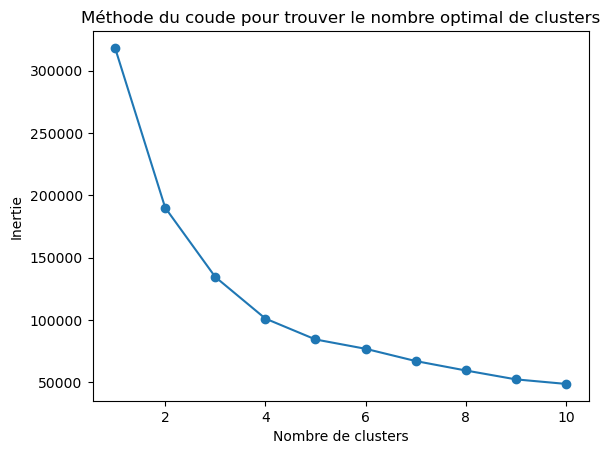

In [51]:
# Normalisation des données
scaler = StandardScaler()
scaled_features = scaler.fit_transform(inondation)

# Liste pour enregistrer les valeurs d'inertie
inertia = []

# Test de différents nombres de clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=333)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Tracer le graphique de l'inertie par rapport au nombre de clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour trouver le nombre optimal de clusters')
plt.show()


Centers of clusters:
[[ 777.50168118    7.44465989   23.58139765]
 [1457.62335092   10.60282892   19.26021554]
 [ 992.70251657    9.13188691   21.32567833]
 [ 784.01034051    5.81409614   35.5727341 ]]


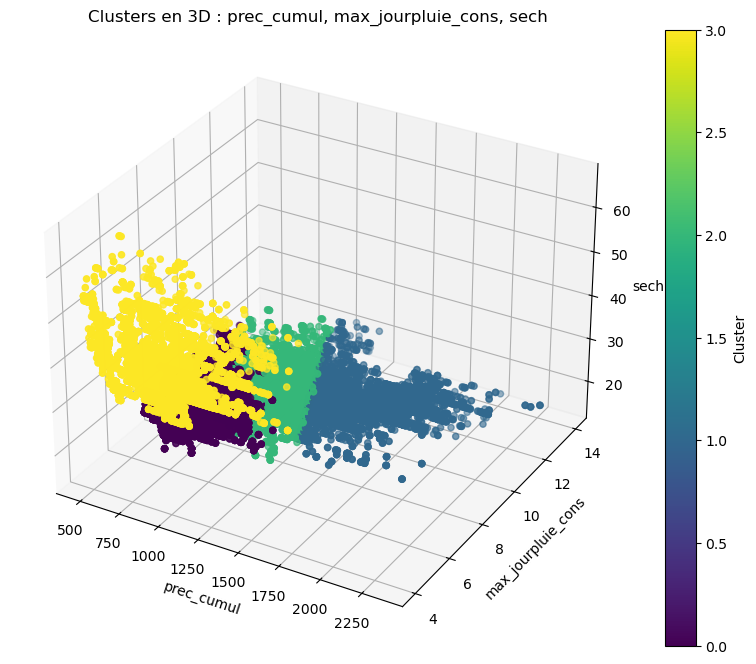

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Appliquer K-Means avec 4 clusters
kmeans = KMeans(n_clusters=4, random_state=333)
kmeans.fit(scaled_features)

# Ajouter les labels de cluster au DataFrame
inondation['cluster'] = kmeans.labels_

# Afficher les centres des clusters
print("Centers of clusters:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

# Visualisation des clusters en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Ajouter les points dans le graphique 3D
scatter = ax.scatter(
    inondation['prec_cumul'], 
    inondation['max_jourpluie_cons'], 
    inondation['sech'], 
    c=inondation['cluster'], 
    cmap='viridis'
)

# Ajouter des labels et un titre
ax.set_title('Clusters en 3D : prec_cumul, max_jourpluie_cons, sech')
ax.set_xlabel('prec_cumul')
ax.set_ylabel('max_jourpluie_cons')
ax.set_zlabel('sech')

# Ajouter une barre de couleur
fig.colorbar(scatter, label='Cluster')

plt.show()


### Analyse des clusters

#### Cluster 1
- **`prec_cumul` moyen** : **777.50**  
  Ce cluster présente des précipitations cumulées modérées.  
- **`max_jourpluie_cons` moyen** : **7.44**  
  Une pluviométrie maximale journalière modérée caractérise ce cluster.  
- **`sech` moyen** : **23.58**  
  Le cluster est associé à une sécheresse modérée.

#### Cluster 2
- **`prec_cumul` moyen** : **1457.62**  
  Ce cluster est caractérisé par un niveau très élevé de précipitations cumulées.  
- **`max_jourpluie_cons` moyen** : **10.60**  
  Ce cluster présente une pluviométrie maximale journalière très importante.  
- **`sech` moyen** : **19.26**  
  Une sécheresse relativement faible distingue ce cluster.

#### Cluster 3
- **`prec_cumul` moyen** : **992.70**  
  Les points de ce cluster montrent des précipitations cumulées élevées.  
- **`max_jourpluie_cons` moyen** : **9.13**  
  Une pluviométrie maximale journalière élevée caractérise ce cluster.  
- **`sech` moyen** : **21.33**  
  Ce cluster est associé à une sécheresse modérée.

#### Cluster 4
- **`prec_cumul` moyen** : **784.01**  
  Ce cluster présente des précipitations cumulées légèrement inférieures.  
- **`max_jourpluie_cons` moyen** : **5.81**  
  Ce cluster se distingue par une pluviométrie maximale journalière faible.  
- **`sech` moyen** : **35.57**  
  Une sécheresse importante caractérise ce cluster.

### Conclusion
- **Cluster 1** : Précipitations cumulées modérées, pluviométrie maximale journalière modérée, sécheresse modérée.  
- **Cluster 2** : Précipitations cumulées très élevées, pluviométrie maximale journalière très importante, faible sécheresse.  
- **Cluster 3** : Précipitations cumulées élevées, pluviométrie maximale journalière élevée, sécheresse modérée.  
- **Cluster 4** : Précipitations cumulées légèrement inférieures, pluviométrie maximale journalière faible, sécheresse importante.


In [55]:
df_drias['inondations'] = inondation['cluster']  # Ajouter la colonne 'inondations' au DataFrame
df_drias  # Afficher le résultat

nom  insee periode  temp_max  nj_f_chal  nj_vdc  \
0          Villy-le-Pelloux  74307      H2     15.51       2.51      53   
1          Villy-le-Pelloux  74307      H3     17.52       8.82     104   
2          Villy-le-Pelloux  74307      H1     14.59       1.19      35   
3                   Antully  71010      H2     15.27       3.12      42   
4                   Antully  71010      H1     14.29       1.42      27   
...                     ...    ...     ...       ...        ...     ...   
106057  Mauzens-et-Miremont  24261      H3     20.65      16.35      78   
106058  Mauzens-et-Miremont  24261      H2     18.81       6.92      42   
106059             Sénarens  31543      H1     17.74       4.67      21   
106060             Sénarens  31543      H3     20.65      18.88      75   
106061             Sénarens  31543      H2     18.81       8.10      37   

        prec_cumul  max_jourpluie_cons  sech  temps_sech  secheresse  \
0          1373.39                   9    21        0.03           0   
1          1370.45                   9    22        0.05           2   
2          1366.91                   9    20        0.03           0   
3           998.62                   9    20        0.03           0   
4           975.90                   9    19        0.05           0   
...            ...                 ...   ...         ...         ...   
106057      862.56                   8    28        0.10           1   
106058      890.11                   9    24        0.05           2   
106059      723.87                   7    24        0.08           0   
106060      642.29                   6    30        0.21           1   
106061      702.50                   7    26        0.08           2   

        inondations  
0                 1  
1                 1  
2                 1  
3                 2  
4                 2  
...             ...  
106057            0  
106058            2  
106059            0  
106060            3  
106061            0  

[106062 rows x 12 columns]

In [56]:
# Création d'une copie temporaire de la colonne 'inondations'
inondations_temp = df_drias['inondations'].copy()

# Réordonner les clusters par ordre croissant
cluster_mapping = {
    old: new 
    for new, old in enumerate(
        df_drias.groupby('inondations')[['prec_cumul', 'max_jourpluie_cons', 'sech']]
        .mean()
        .sort_values(by=['sech', 'max_jourpluie_cons', 'prec_cumul'])
        .index
    )
}

# Appliquer le mapping à la copie temporaire
inondations_temp = inondations_temp.map(cluster_mapping)

# Vérifier le résultat
print(inondations_temp.value_counts().sort_index())



inondations
0     8876
1    38622
2    50576
3     7988
Name: count, dtype: int64


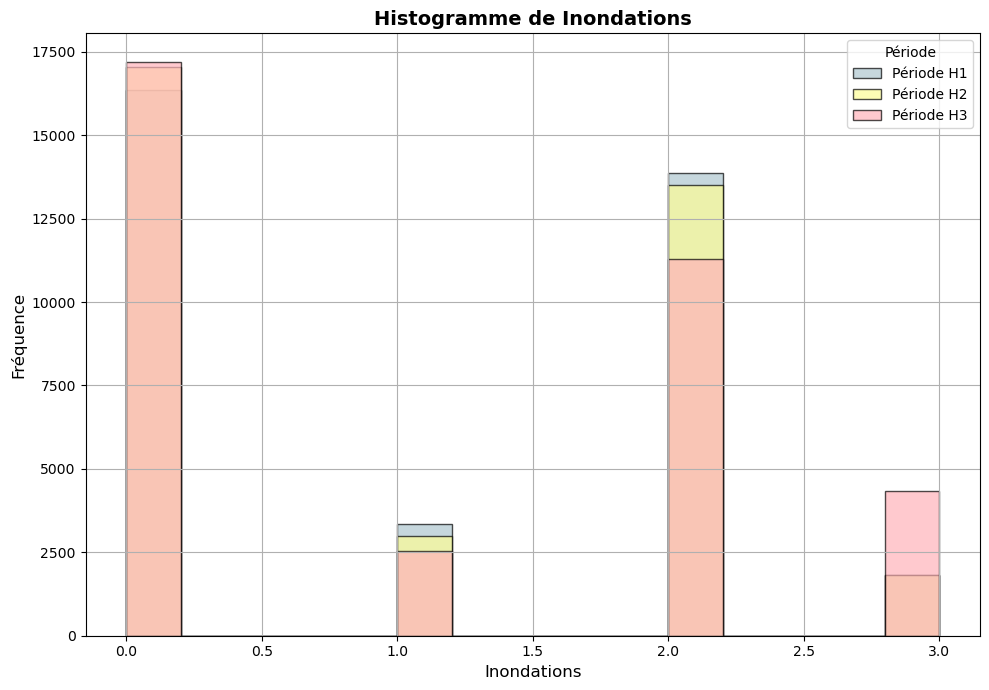

In [58]:
# Définition des couleurs pour les périodes
colors = ['#AEC6CF', '#FDFD96', '#FFB3BA']  # H1: Bleu, H2: Jaune, H3: Rouge

# Création de la figure pour l'histogramme
fig, ax = plt.subplots(figsize=(10, 7))

# Tracer l'histogramme pour chaque groupe de périodes
for j, (key, group) in enumerate(df_drias.groupby('periode')):
    group['inondations'].hist(alpha=0.7, ax=ax, label=f"Période {key}", color=colors[j], edgecolor='black', bins=15)

# Personnalisation du graphique
ax.set_title('Histogramme de Inondations', fontsize=14, fontweight='bold')
ax.set_xlabel('Inondations', fontsize=12)
ax.set_ylabel('Fréquence', fontsize=12)
ax.legend(title='Période', loc='best')

plt.tight_layout()
plt.show()

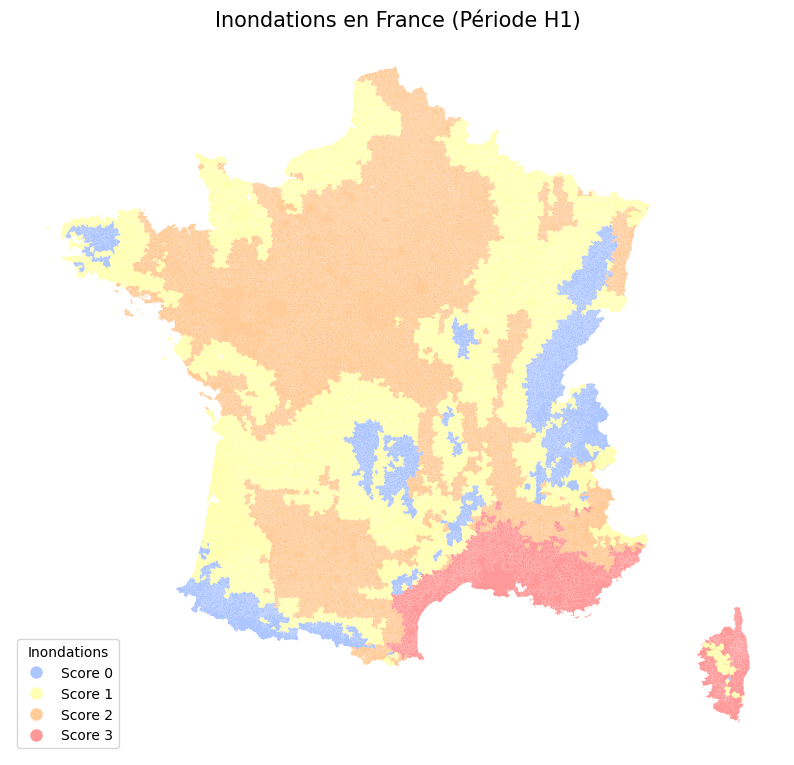

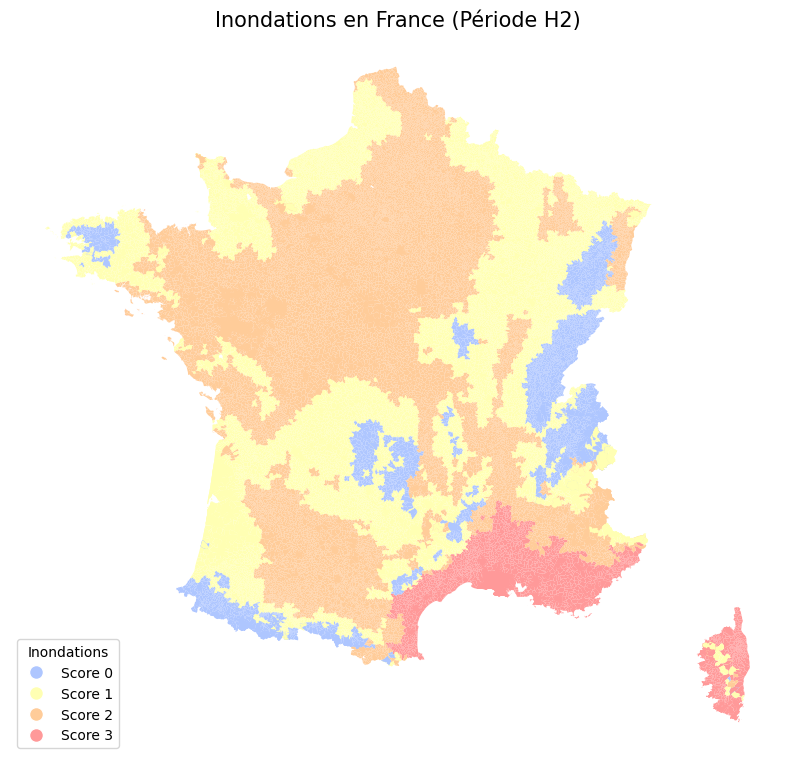

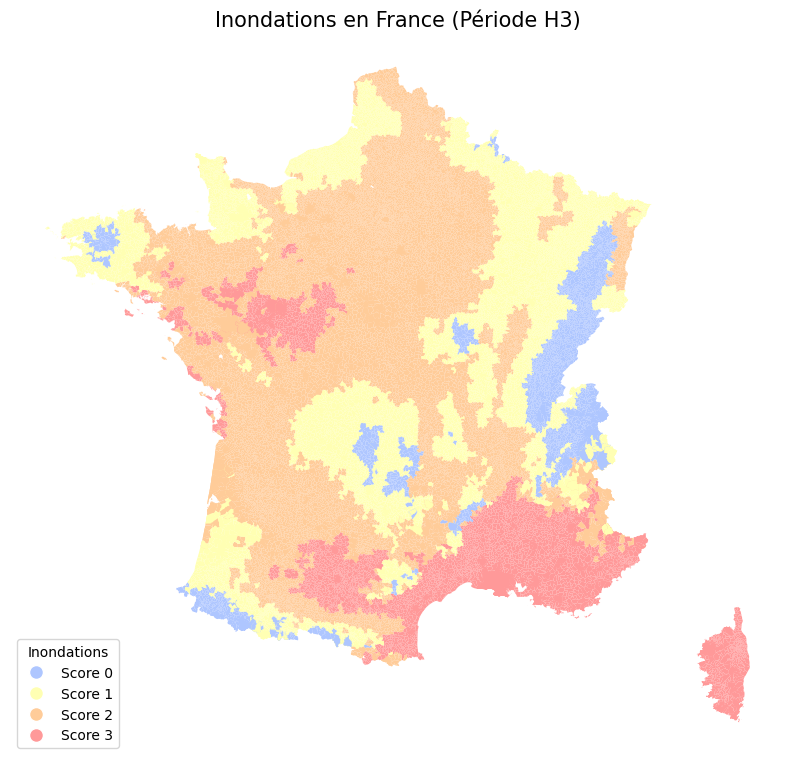

In [58]:
# Fonction pour afficher une carte des inondations pour une période donnée
def plot_inondations_map(period, commune_map, title):
    # Filtrer les données pour la période et mapper les couleurs des scores
    color_map = {0: '#aec6ff', 1: '#ffffb3', 2: '#ffcc99', 3: '#ff9999'}
    period_data = commune_map[commune_map["periode"] == period]
    period_data['color'] = period_data['inondations'].map(color_map)

    # Tracer la carte
    fig, ax = plt.subplots(figsize=(10, 10))
    period_data.plot(ax=ax, color=period_data['color'])
    ax.set_title(title, fontsize=15)
    ax.axis('off')

    # Ajouter la légende
    ax.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Score {score}')
                       for score, color in color_map.items()], loc='lower left', title="Inondations")
    plt.show()

try:
    # Charger et préparer les données géographiques
    commune_map = gpd.read_file("qgis/COMMUNE.shp")
    commune_map["INSEE_COM"] = commune_map["INSEE_COM"].astype(str)
    df_drias["insee"] = df_drias["insee"].astype(str)
    df_drias['inondations'] = inondations_temp  # Remplacer par les clusters organisés
    commune_map = commune_map.merge(df_drias, left_on="INSEE_COM", right_on="insee")
    
except Exception as e:
    print(f"Erreur lors du chargement ou de la préparation des données géographiques : {e}")

# Générer les cartes pour chaque période
for period, title in [("H1", "Inondations en France (Période H1)"),
                      ("H2", "Inondations en France (Période H2)"),
                      ("H3", "Inondations en France (Période H3)")]:
    try:
        plot_inondations_map(period, commune_map, title)
    except Exception as e:
        print(f"Erreur lors de la génération de la carte pour la période {period} : {e}")


<h2 style="padding:16px; color:#FFF; background:#800000"> 3) Feux de forêt</h2>

Les variables `nj_f_chal` (nombre de jours de forte chaleur) et `feu_foret` (nombre de feux de forêt dans la région) ont été retenues pour leur capacité à évaluer les risques liés aux feux de forêt.

La variable `nj_f_chal` mesure la fréquence des jours de forte chaleur. Les fortes chaleurs augmentent le stress hydrique des végétaux, réduisent l’humidité ambiante et créent des conditions favorables à l’inflammabilité des forêts, ce qui en fait un indicateur pertinent pour anticiper les risques.

La variable `feu_foret`, quant à elle, représente le nombre d’incendies enregistrés dans une région. Cet indicateur fournit une perspective historique sur la prévalence des feux de forêt et permet d’identifier les zones particulièrement vulnérables.

En combinant ces deux variables, l’analyse intègre à la fois les conditions climatiques propices aux feux et l’occurrence réelle des incendies.


In [64]:
feu = pd.read_csv("DRIAS/feux_foret.csv", usecols=[3, 15, 16])
feu

INSEE_COM P�riode  NORNSV25
0          74307      H2         0
1          74307      H3         0
2          74307      H1         0
3          71010      H2         0
4          71010      H1         0
...          ...     ...       ...
106057     24261      H3         2
106058     24261      H2         1
106059     31543      H1         1
106060     31543      H3         9
106061     31543      H2         1

[106062 rows x 3 columns]

In [66]:
colname_feu = ['insee', # Code insee commune
               'periode', # Horizon de temps
               'feu_foret' # Indice de feu de fôret
              ]
feu.columns = colname_feu

In [68]:
df_drias = pd.concat([df_drias, feu['feu_foret']], axis=1)
df_drias

nom  insee periode  temp_max  nj_f_chal  nj_vdc  \
0          Villy-le-Pelloux  74307      H2     15.51       2.51      53   
1          Villy-le-Pelloux  74307      H3     17.52       8.82     104   
2          Villy-le-Pelloux  74307      H1     14.59       1.19      35   
3                   Antully  71010      H2     15.27       3.12      42   
4                   Antully  71010      H1     14.29       1.42      27   
...                     ...    ...     ...       ...        ...     ...   
106057  Mauzens-et-Miremont  24261      H3     20.65      16.35      78   
106058  Mauzens-et-Miremont  24261      H2     18.81       6.92      42   
106059             Sénarens  31543      H1     17.74       4.67      21   
106060             Sénarens  31543      H3     20.65      18.88      75   
106061             Sénarens  31543      H2     18.81       8.10      37   

        prec_cumul  max_jourpluie_cons  sech  temps_sech  secheresse  \
0          1373.39                   9    21        0.03           0   
1          1370.45                   9    22        0.05           2   
2          1366.91                   9    20        0.03           0   
3           998.62                   9    20        0.03           0   
4           975.90                   9    19        0.05           0   
...            ...                 ...   ...         ...         ...   
106057      862.56                   8    28        0.10           1   
106058      890.11                   9    24        0.05           2   
106059      723.87                   7    24        0.08           0   
106060      642.29                   6    30        0.21           1   
106061      702.50                   7    26        0.08           2   

        inondations  feu_foret  
0                 1          0  
1                 1          0  
2                 1          0  
3                 2          0  
4                 2          0  
...             ...        ...  
106057            0          2  
106058            2          1  
106059            0          1  
106060            3          9  
106061            0          1  

[106062 rows x 13 columns]

In [70]:
feu = df_drias[['nj_f_chal', 'feu_foret']]
feu

nj_f_chal  feu_foret
0            2.51          0
1            8.82          0
2            1.19          0
3            3.12          0
4            1.42          0
...           ...        ...
106057      16.35          2
106058       6.92          1
106059       4.67          1
106060      18.88          9
106061       8.10          1

[106062 rows x 2 columns]

**On regarde s'il y a des valeurs manquantes ou des Nan**

In [73]:
missing_values = df_drias.isnull().sum()
print("Valeurs manquantes par colonne :", missing_values)
print(f"Total des NaN dans le DataFrame : {missing_values.sum()}")

Valeurs manquantes par colonne : nom                   0
insee                 0
periode               0
temp_max              0
nj_f_chal             0
nj_vdc                0
prec_cumul            0
max_jourpluie_cons    0
sech                  0
temps_sech            0
secheresse            0
inondations           0
feu_foret             0
dtype: int64
Total des NaN dans le DataFrame : 0


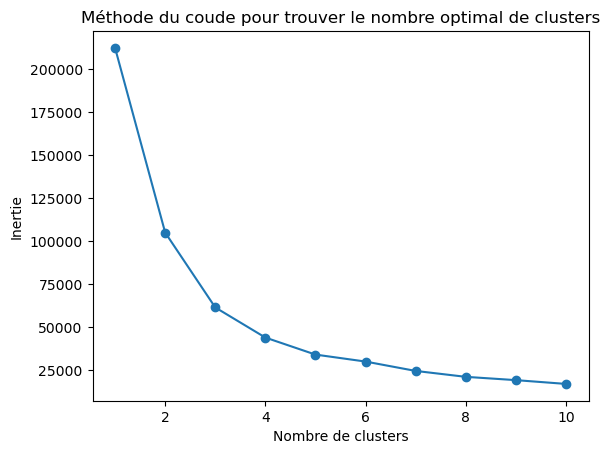

In [75]:
# Normalisation des données
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feu)

# Liste pour enregistrer les valeurs d'inertie
inertia = []

# Test de différents nombres de clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=333)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Tracer le graphique de l'inertie par rapport au nombre de clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour trouver le nombre optimal de clusters')
plt.show()

**Selon la règle du coude on trouve 4 clusters**

Centers of clusters:
[[ 2.43335059  0.27916225]
 [17.10725622  7.89578094]
 [26.34906962 27.24768946]
 [ 9.41686917  1.36098856]]


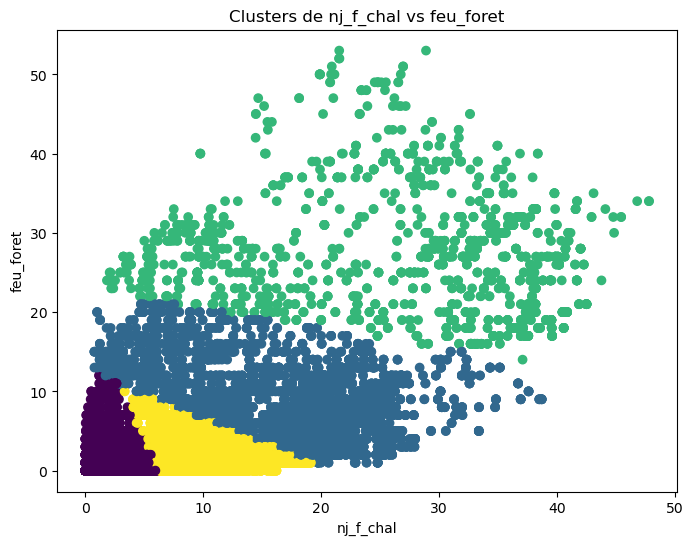

In [77]:
# Appliquer K-Means avec 4 clusters
kmeans = KMeans(n_clusters=4, random_state=333)
kmeans.fit(scaled_features)

# Ajouter les labels de cluster au DataFrame
feu['cluster'] = kmeans.labels_

# Afficher les centres des clusters
print("Centers of clusters:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

# Visualisation des clusters
plt.figure(figsize=(8, 6))
plt.scatter(feu['nj_f_chal'], feu['feu_foret'], c=feu['cluster'], cmap='viridis')
plt.title('Clusters de nj_f_chal vs feu_foret')
plt.xlabel('nj_f_chal')
plt.ylabel('feu_foret')
plt.show()


# Résultats des clusters

Les résultats du **K-Means** pour les données `nj_f_chal` (nombre de jours de forte chaleur) et `feu_foret` (occurrence de feux de forêt) montrent les centres de chaque cluster. Chaque ligne correspond à un **cluster** :

## Cluster 1
- **nj_f_chal moyen** : 2.43 jours  
  Cela représente un très faible nombre de jours de forte chaleur.
- **feu_foret moyen** : 0.28  
  Cela indique une occurrence très faible de feux de forêt.

## Cluster 2
- **nj_f_chal moyen** : 17.11 jours  
  Cela correspond à un nombre modéré de jours de forte chaleur.
- **feu_foret moyen** : 7.90  
  Cela indique une occurrence moyenne de feux de forêt.

## Cluster 3
- **nj_f_chal moyen** : 26.35 jours  
  Cela correspond à un nombre élevé de jours de forte chaleur.
- **feu_foret moyen** : 27.25  
  Cela indique une occurrence importante de feux de forêt.

## Cluster 4
- **nj_f_chal moyen** : 9.42 jours  
  Cela correspond à un faible à modéré nombre de jours de forte chaleur.
- **feu_foret moyen** : 1.36  
  Cela indique une occurrence faible de feux de forêt.

---

## Conclusion

- **Cluster 1** : Caractérisé par un très faible nombre de jours de forte chaleur et une occurrence très faible de feux de forêt.  
- **Cluster 2** : Présente un nombre modéré de jours de forte chaleur et une occurrence moyenne de feux de forêt.  
- **Cluster 3** : Caractérisé par un nombre élevé de jours de forte chaleur et une occurrence importante de feux de forêt.  
- **Cluster 4** : Montre un faible à modéré nombre de jours de forte chaleur et une occurrence faible de feux de forêt.


In [81]:
df_drias['feux_de_forêts'] = feu['cluster']  # Ajouter la colonne 'secheresse' au DataFrame
df_drias  # Afficher le résultat

nom  insee periode  temp_max  nj_f_chal  nj_vdc  \
0          Villy-le-Pelloux  74307      H2     15.51       2.51      53   
1          Villy-le-Pelloux  74307      H3     17.52       8.82     104   
2          Villy-le-Pelloux  74307      H1     14.59       1.19      35   
3                   Antully  71010      H2     15.27       3.12      42   
4                   Antully  71010      H1     14.29       1.42      27   
...                     ...    ...     ...       ...        ...     ...   
106057  Mauzens-et-Miremont  24261      H3     20.65      16.35      78   
106058  Mauzens-et-Miremont  24261      H2     18.81       6.92      42   
106059             Sénarens  31543      H1     17.74       4.67      21   
106060             Sénarens  31543      H3     20.65      18.88      75   
106061             Sénarens  31543      H2     18.81       8.10      37   

        prec_cumul  max_jourpluie_cons  sech  temps_sech  secheresse  \
0          1373.39                   9    21        0.03           0   
1          1370.45                   9    22        0.05           2   
2          1366.91                   9    20        0.03           0   
3           998.62                   9    20        0.03           0   
4           975.90                   9    19        0.05           0   
...            ...                 ...   ...         ...         ...   
106057      862.56                   8    28        0.10           1   
106058      890.11                   9    24        0.05           2   
106059      723.87                   7    24        0.08           0   
106060      642.29                   6    30        0.21           1   
106061      702.50                   7    26        0.08           2   

        inondations  feu_foret  feux_de_forêts  
0                 1          0               0  
1                 1          0               3  
2                 1          0               0  
3                 2          0               0  
4                 2          0               0  
...             ...        ...             ...  
106057            0          2               3  
106058            2          1               3  
106059            0          1               0  
106060            3          9               1  
106061            0          1               3  

[106062 rows x 14 columns]

In [83]:
# Création d'une copie temporaire de la colonne 'feux_de_forêts'
feux_temp = df_drias['feux_de_forêts'].copy()

# Réordonner les clusters par ordre croissant
cluster_mapping = {
    old: new
    for new, old in enumerate(
        df_drias.groupby('feux_de_forêts')[['feu_foret', 'nj_f_chal']].mean()
        .sort_values(by=['feu_foret', 'nj_f_chal']).index
    )
}

# Appliquer le mapping à la copie temporaire
feux_temp = feux_temp.map(cluster_mapping)

# Vérifier le résultat sur la copie temporaire
print(feux_temp.value_counts().sort_index())


feux_de_forêts
0    71536
1    25728
2     7175
3     1623
Name: count, dtype: int64


### Explication des clusters

Dans les résultats obtenus par l'algorithme de **K-Means**, les indices des clusters sont attribués de manière numérique, où :
- **0** correspond au **Cluster 1**
- **1** correspond au **Cluster 2**
- **2** correspond au **Cluster 3**
- **3** correspond au **Cluster 4**

Ces clusters représentent des groupes de données similaires en termes de `nj_f_chal` (nombre de jours de feu de forêt) et `feu_foret` (intensité des feux de forêt).

- **Cluster 1 (0)** : Ce groupe est caractérisé par un **faible nombre de jours de feu de forêt** et une **intensité faible** des feux. Cela suggère des conditions climatiques moins extrêmes, avec un risque réduit d'incendies.

- **Cluster 2 (1)** : Ce cluster présente un **nombre modéré de jours de feu de forêt** et une **intensité modérée** des feux. Les conditions sont plus marquées que dans le Cluster 1, indiquant un risque accru mais encore gérable.

- **Cluster 3 (2)** : Ce cluster représente des conditions **très chaudes** avec un **nombre élevé de jours de feu de forêt** et une **intensité élevée** des feux. Ces périodes reflètent des risques importants, souvent associés à des feux plus sévères et fréquents.

- **Cluster 4 (3)** : Ce groupe présente un **nombre faible à modéré de jours de feu de forêt**, mais avec une **intensité légère** des feux. Cela peut indiquer des conditions intermédiaires, où les feux sont présents mais moins intenses.

### Conclusion

L'algorithme **K-Means** a permis d'identifier quatre groupes distincts en fonction des variables `nj_f_chal` et `feu_foret`, ce qui permet d'analyser et de différencier les conditions climatiques et leurs impacts sur les feux de forêt :

- **Cluster 1 (0)** : Conditions les moins extrêmes.  
- **Cluster 2 (1)** : Conditions modérées avec un risque accru.  
- **Cluster 3 (2)** : Conditions extrêmes avec des risques majeurs.  
- **Cluster 4 (3)** : Conditions intermédiaires, moins sévères que le Cluster 3.


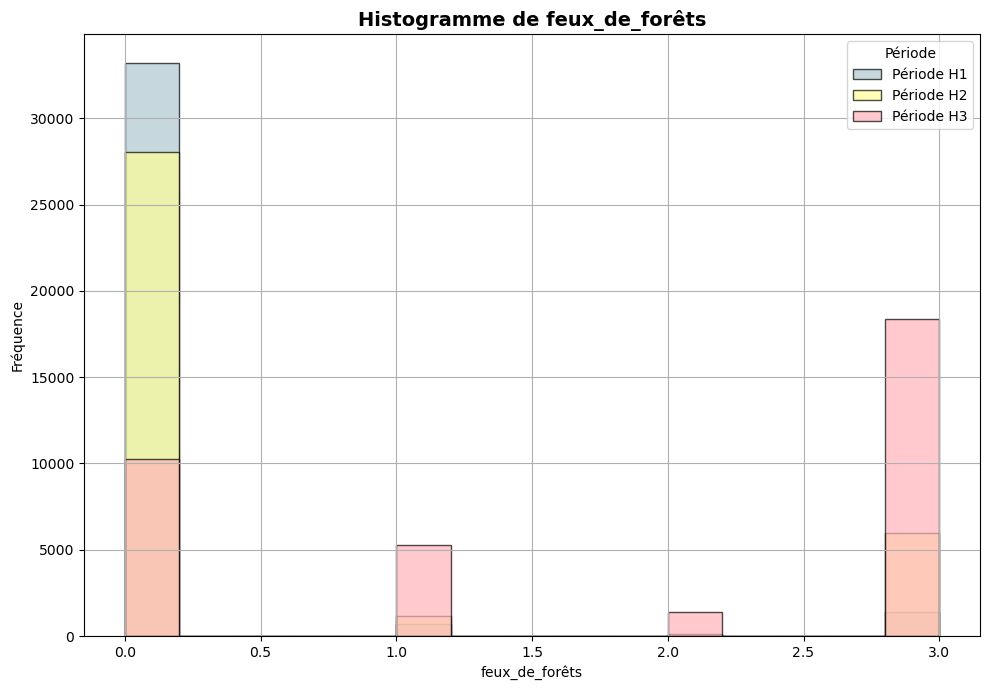

In [86]:
# Définition des couleurs pastel pour les horizons H1 (2021-2050), H2 (2051-2070) et H3 (2071-2100)
colors = ['#AEC6CF', '#FDFD96', '#FFB3BA']  # H1: Bleu, H2: Jaune, H3: Rouge
fig, ax = plt.subplots(figsize=(10, 7))

for j, (key, group) in enumerate(df_drias.groupby('periode')):
    group['feux_de_forêts'].hist(alpha=0.7, ax=ax, label=f"Période {key}", color=colors[j], edgecolor='black', bins=15)

ax.set_title('Histogramme de feux_de_forêts', fontsize=14, fontweight='bold')
ax.set_xlabel('feux_de_forêts')
ax.set_ylabel('Fréquence')
ax.legend(title='Période', loc='best')
plt.tight_layout()
plt.show()

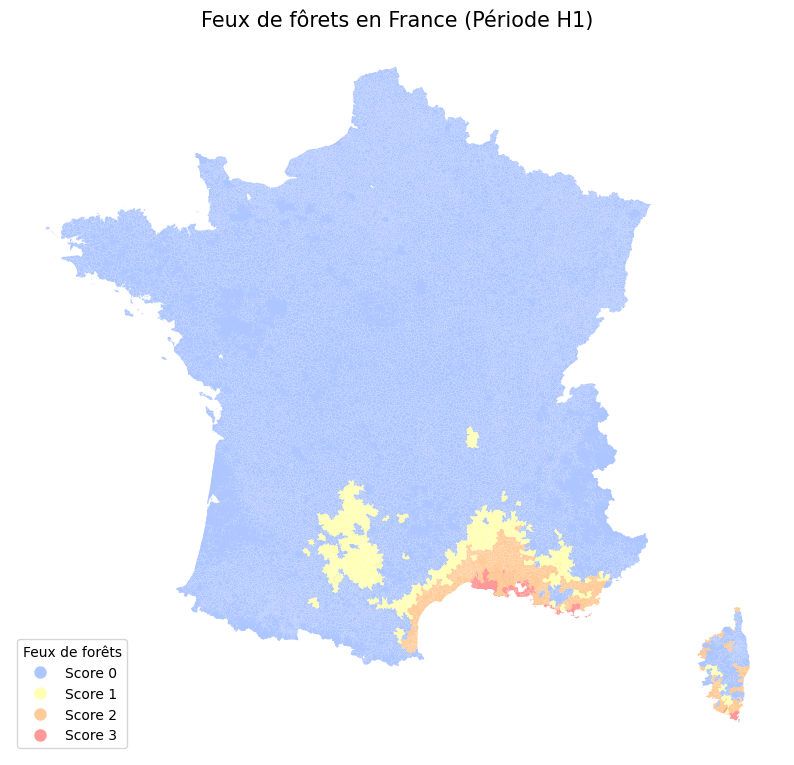

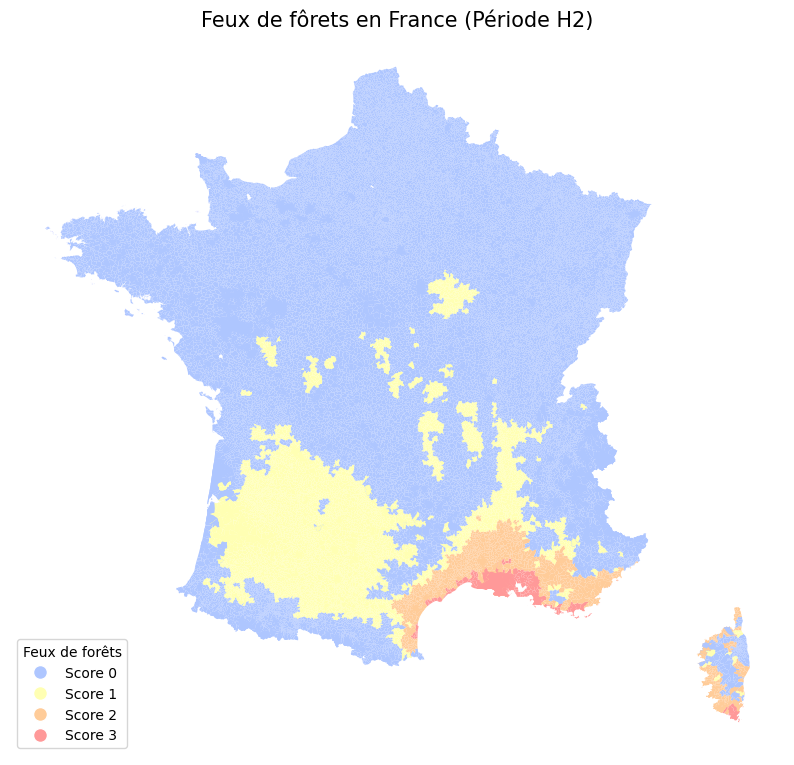

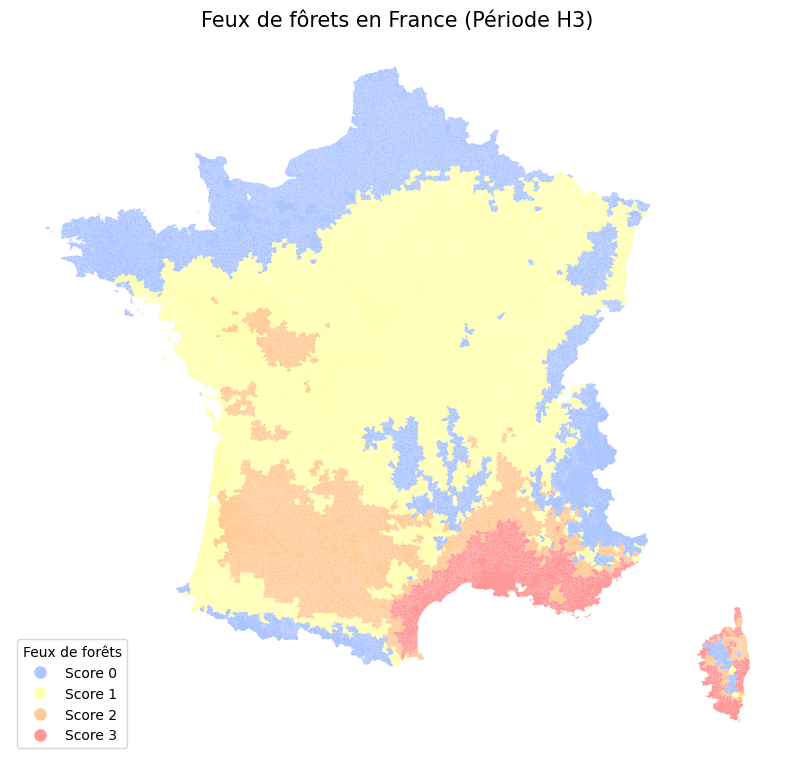

In [1209]:
def plot_vagues_de_chaleur_map(period, commune_map):
    # Filtrer les données et mapper les couleurs
    color_map = {0: '#aec6ff', 1: '#ffffb3', 2: '#ffcc99', 3: '#ff9999'}
    period_data = commune_map[commune_map["periode"] == period]
    period_data['color'] = period_data['feux_de_forêts'].map(color_map)

    # Tracer la carte
    fig, ax = plt.subplots(figsize=(10, 10))
    period_data.plot(ax=ax, color=period_data['color'])
    ax.set_title(f"Feux de fôrets en France (Période {period})", fontsize=15)
    ax.axis('off')

    # Ajouter la légende
    ax.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Score {score}')
                       for score, color in color_map.items()], loc='lower left', title="Feux de forêts")
    plt.show()

try:
    # Charger et préparer les données géographiques
    commune_map = gpd.read_file("qgis/COMMUNE.shp")
    commune_map["INSEE_COM"] = commune_map["INSEE_COM"].astype(str)
    df_drias["insee"] = df_drias["insee"].astype(str)
    df_drias['feux_de_forêts'] = feux_temp  # Remplacer par les clusters organisés
    commune_map = commune_map.merge(df_drias, left_on="INSEE_COM", right_on="insee")
except Exception as e:
    print(f"Erreur lors du chargement ou de la préparation des données géographiques : {e}")

# Générer les cartes pour chaque période
for period in ["H1", "H2", "H3"]:
    try:
        plot_vagues_de_chaleur_map(period, commune_map)
    except Exception as e:
        print(f"Erreur lors de la génération de la carte pour la période {period} : {e}")

<h2 style="padding:16px; color:#FFF; background:#800000"> 4) Vagues de chaleur</h2>

Les variables `temp_max` (température maximale en °C) et `nj_vdc` (nombre de jours dans une vague de chaleur) ont été sélectionnées pour leur pertinence dans l’analyse des vagues de chaleur.

La variable `temp_max` mesure les températures maximales atteintes sur une période donnée. En analysant les températures maximales, on peut évaluer l’intensité des vagues de chaleur et identifier les régions les plus exposées. La variable `nj_vdc` capture la durée des vagues de chaleur, définies comme des périodes où la température maximale dépasse de plus de 5 °C la normale saisonnière pendant au moins 5 jours consécutifs.

En combinant `temp_max` et `nj_vdc`, il est possible d’obtenir une vision complète des vagues de chaleur. La mesure en **intensité** et en **durée** permet de mieux comprendre la gravité de ces phénomènes, d’évaluer leurs impacts sur les différentes régions et de modéliser les risques futurs dans un contexte de changement climatique.


In [88]:
vdc = df_drias[['temp_max', 'nj_vdc']]
vdc

temp_max  nj_vdc
0          15.51      53
1          17.52     104
2          14.59      35
3          15.27      42
4          14.29      27
...          ...     ...
106057     20.65      78
106058     18.81      42
106059     17.74      21
106060     20.65      75
106061     18.81      37

[106062 rows x 2 columns]

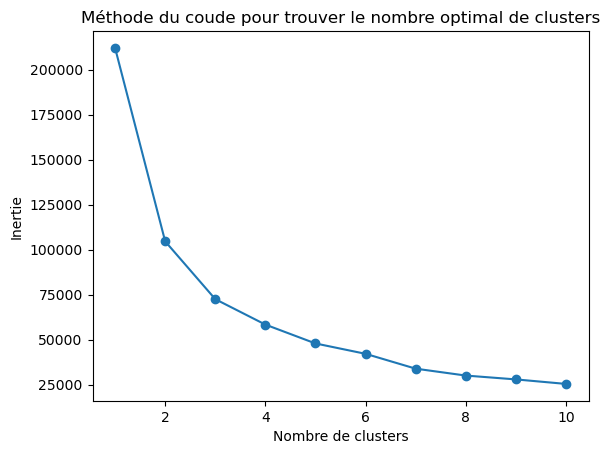

In [90]:
# Normalisation des données
scaler = StandardScaler()
scaled_features = scaler.fit_transform(vdc)

# Liste pour enregistrer les valeurs d'inertie
inertia = []

# Test de différents nombres de clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=333)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Tracer le graphique de l'inertie par rapport au nombre de clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour trouver le nombre optimal de clusters')
plt.show()

**Selon la règle du coude on trouve 3 clusters**

Centers of clusters:
[[18.22254024 33.0271838 ]
 [15.19884556 28.76654831]
 [18.76659809 78.541865  ]]


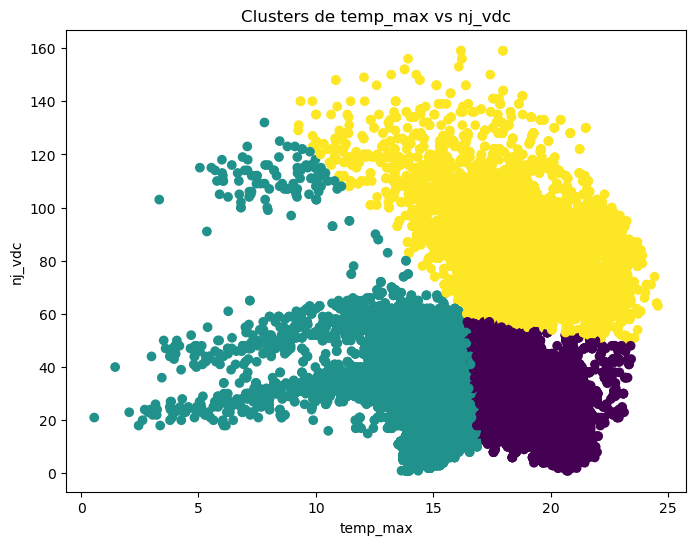

In [93]:
# Appliquer K-Means avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=333)
kmeans.fit(scaled_features)

# Ajouter les labels de cluster au DataFrame
vdc['cluster'] = kmeans.labels_

# Afficher les centres des clusters
print("Centers of clusters:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

# Visualisation des clusters
plt.figure(figsize=(8, 6))
plt.scatter(vdc['temp_max'], vdc['nj_vdc'], c=vdc['cluster'], cmap='viridis')
plt.title('Clusters de temp_max vs nj_vdc')
plt.xlabel('temp_max')
plt.ylabel('nj_vdc')
plt.show()


## **Interprétation des résultats**

### Centres des clusters

- La première colonne représente la **moyenne des valeurs** de la variable `nj_f_chal` (probablement le nombre de jours de forte chaleur).
- La deuxième colonne représente la **moyenne des valeurs** de la variable `feu_foret` (probablement l'occurrence de feux de forêt).

### **Description des clusters**

#### **Cluster 1**
- **nj_f_chal moyen** : **18.22 jours**  
  Les points de ce cluster ont en moyenne un nombre modéré de jours de forte chaleur.
- **feu_foret moyen** : **33.03**  
  Les points de ce cluster ont en moyenne une occurrence modérée de feux de forêt.

#### **Cluster 2**
- **nj_f_chal moyen** : **15.20 jours**  
  Les points de ce cluster ont en moyenne un nombre faible de jours de forte chaleur.
- **feu_foret moyen** : **28.77**  
  Les points de ce cluster présentent une occurrence faible à modérée de feux de forêt.

#### **Cluster 3**
- **nj_f_chal moyen** : **18.77 jours**  
  Les points de ce cluster ont en moyenne un nombre élevé de jours de forte chaleur.
- **feu_foret moyen** : **78.54**  
  Ce cluster est caractérisé par une occurrence très importante de feux de forêt.

---

### **Conclusion**

- **Cluster 1** : Nombre modéré de jours de forte chaleur et occurrence moyenne de feux de forêt.  
- **Cluster 2** : Nombre faible de jours de forte chaleur et faible à modérée occurrence de feux de forêt.  
- **Cluster 3** : Nombre élevé de jours de forte chaleur et occurrence significativement élevée de feux de forêt.


In [95]:
df_drias['vagues_de_chaleur'] = vdc['cluster']  # Ajouter la colonne 'secheresse' au DataFrame
df_drias  # Afficher le résultat

nom  insee periode  temp_max  nj_f_chal  nj_vdc  \
0          Villy-le-Pelloux  74307      H2     15.51       2.51      53   
1          Villy-le-Pelloux  74307      H3     17.52       8.82     104   
2          Villy-le-Pelloux  74307      H1     14.59       1.19      35   
3                   Antully  71010      H2     15.27       3.12      42   
4                   Antully  71010      H1     14.29       1.42      27   
...                     ...    ...     ...       ...        ...     ...   
106057  Mauzens-et-Miremont  24261      H3     20.65      16.35      78   
106058  Mauzens-et-Miremont  24261      H2     18.81       6.92      42   
106059             Sénarens  31543      H1     17.74       4.67      21   
106060             Sénarens  31543      H3     20.65      18.88      75   
106061             Sénarens  31543      H2     18.81       8.10      37   

        prec_cumul  max_jourpluie_cons  sech  temps_sech  secheresse  \
0          1373.39                   9    21        0.03           0   
1          1370.45                   9    22        0.05           2   
2          1366.91                   9    20        0.03           0   
3           998.62                   9    20        0.03           0   
4           975.90                   9    19        0.05           0   
...            ...                 ...   ...         ...         ...   
106057      862.56                   8    28        0.10           1   
106058      890.11                   9    24        0.05           2   
106059      723.87                   7    24        0.08           0   
106060      642.29                   6    30        0.21           1   
106061      702.50                   7    26        0.08           2   

        inondations  feu_foret  feux_de_forêts  vagues_de_chaleur  
0                 1          0               0                  1  
1                 1          0               3                  2  
2                 1          0               0                  1  
3                 2          0               0                  1  
4                 2          0               0                  1  
...             ...        ...             ...                ...  
106057            0          2               3                  2  
106058            2          1               3                  0  
106059            0          1               0                  0  
106060            3          9               1                  2  
106061            0          1               3                  0  

[106062 rows x 15 columns]

In [96]:
# Création d'une copie temporaire de la colonne 'vagues_de_chaleur'
vagues_temp = df_drias['vagues_de_chaleur'].copy()

# Réordonner les clusters par ordre croissant
cluster_mapping = {
    old: new
    for new, old in enumerate(
        df_drias.groupby('vagues_de_chaleur')[['temp_max', 'nj_vdc']].mean()
        .sort_values(by=['temp_max', 'nj_vdc']).index
    )
}

# Appliquer le mapping à la copie temporaire
vagues_temp = vagues_temp.map(cluster_mapping)

# Vérifier le résultat sur la copie temporaire
print(vagues_temp.value_counts().sort_index())


vagues_de_chaleur
0    45421
1    29344
2    31297
Name: count, dtype: int64


### Explication des clusters

Dans les résultats obtenus par l'algorithme de **K-Means**, les indices des clusters sont attribués de manière numérique, où :
- **0** correspond au **Cluster 1**
- **1** correspond au **Cluster 2**
- **2** correspond au **Cluster 3**

Ces clusters représentent des groupes de données similaires en termes de `temp_max` (température maximale) et `nj_vdc` (nombre de jours de vagues de chaleur).

- **Cluster 1 (0)** : Ce groupe est caractérisé par des **températures maximales relativement faibles** et un **faible nombre de jours de vagues de chaleur**. Il correspond à des périodes moins chaudes et avec un nombre limité de jours où des vagues de chaleur se produisent.
- **Cluster 2 (1)** : Ce cluster présente des **températures maximales plus élevées** et un **nombre plus important de jours de vagues de chaleur** comparé au Cluster 1. Les conditions sont plus chaudes et il y a davantage de jours de vagues de chaleur, bien qu'il ne soit pas aussi extrême que le Cluster 3.
- **Cluster 3 (2)** : Ce cluster représente les conditions les **plus chaudes**, avec des **températures maximales élevées** et un **nombre très élevé de jours de vagues de chaleur**. Il est caractérisé par des périodes particulièrement chaudes avec une fréquence élevée de vagues de chaleur, suggérant des conditions climatiques extrêmes.


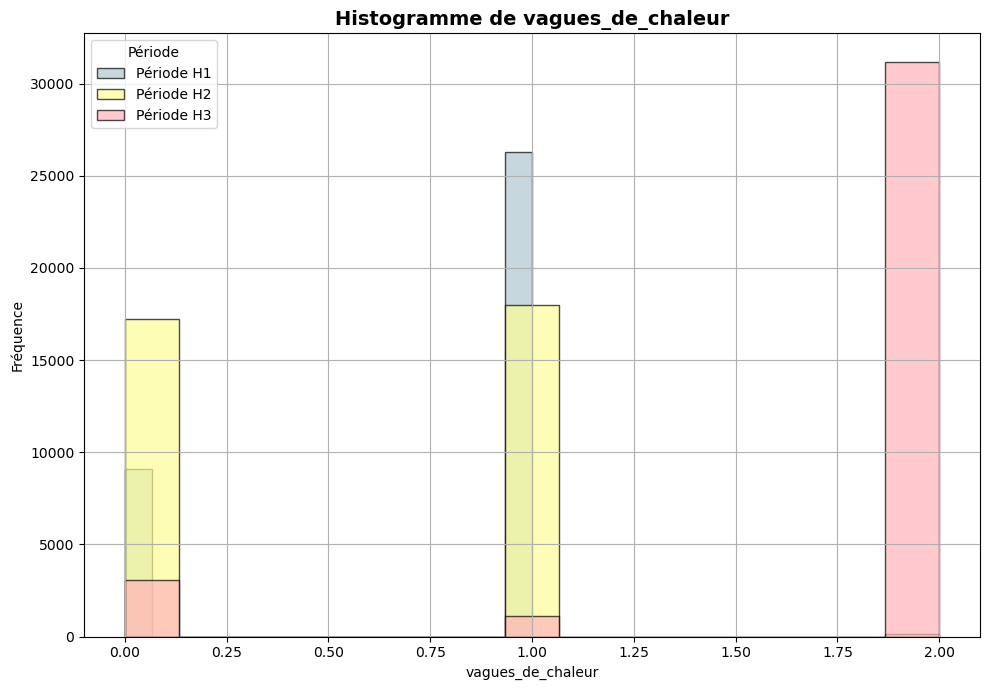

In [101]:
colors = ['#AEC6CF', '#FDFD96', '#FFB3BA']  # Couleurs pour H1, H2, H3
fig, ax = plt.subplots(figsize=(10, 7))

# Tracer l'histogramme pour chaque période
for j, (key, group) in enumerate(df_drias.groupby('periode')):
    group['vagues_de_chaleur'].hist(alpha=0.7, ax=ax, label=f"Période {key}", color=colors[j], edgecolor='black', bins=15)

ax.set_title('Histogramme de vagues_de_chaleur', fontsize=14, fontweight='bold')
ax.set_xlabel('vagues_de_chaleur')
ax.set_ylabel('Fréquence')
ax.legend(title='Période', loc='best')
plt.tight_layout()
plt.show()

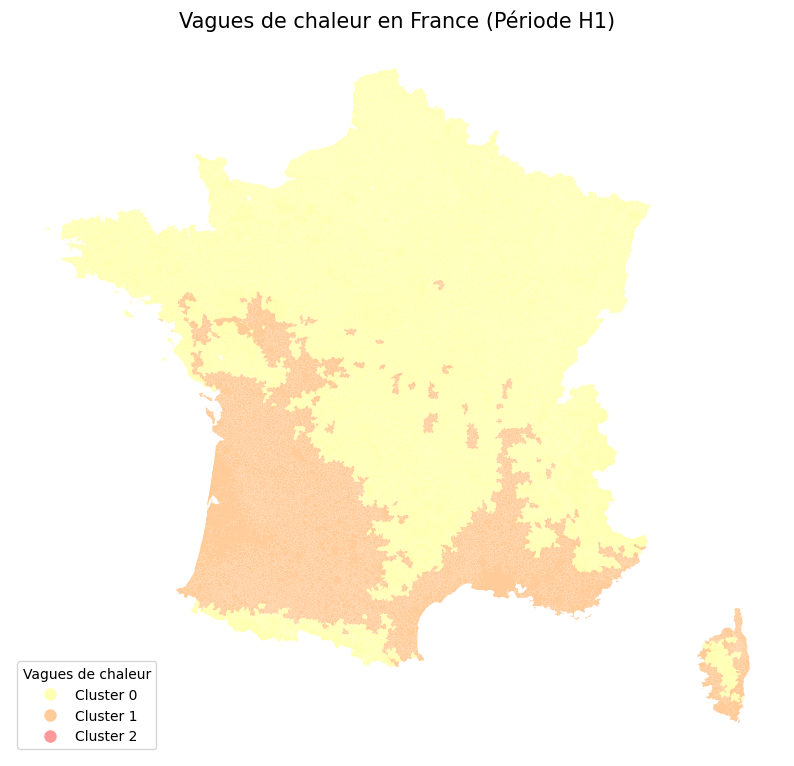

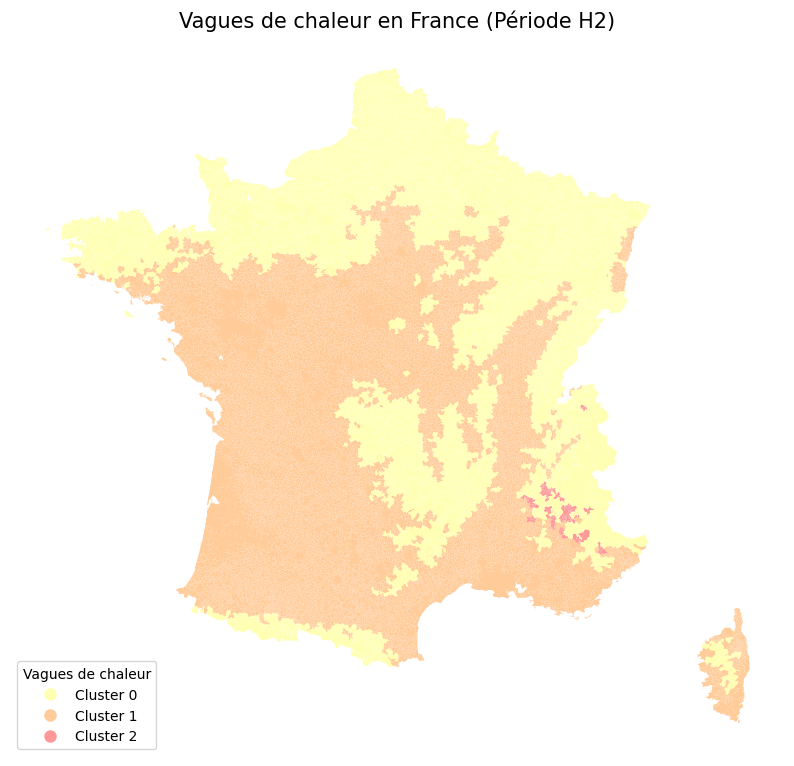

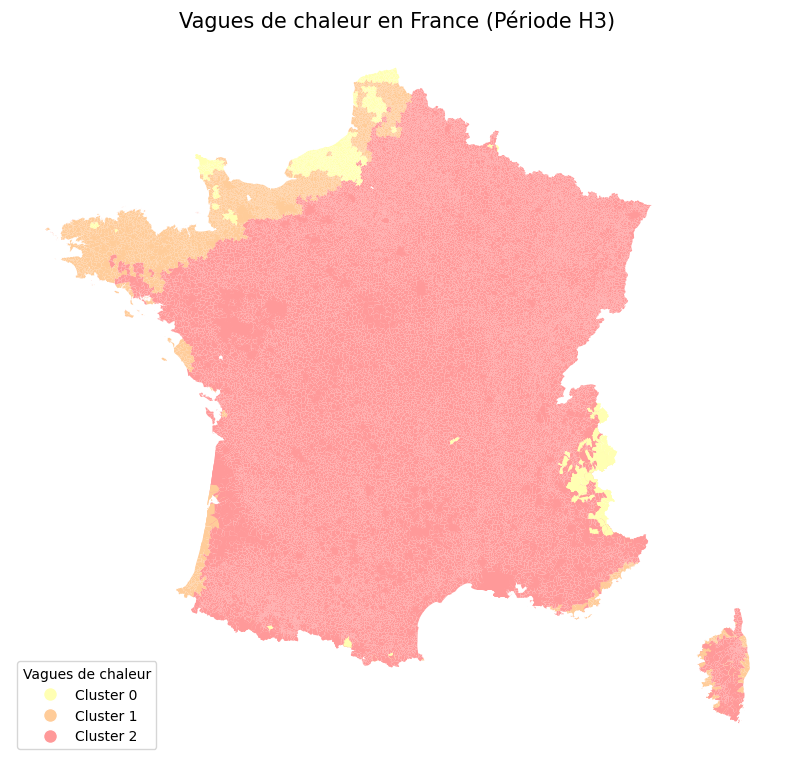

In [1227]:
# Fonction pour afficher une carte des vagues de chaleur pour une période donnée
def plot_vagues_de_chaleur_map(period, commune_map):
    # Filtrer les données et mapper les couleurs
    color_map = {0:'#ffffb3', 1: '#ffcc99', 2: '#ff9999'}  # Couleurs des clusters
    period_data = commune_map[commune_map["periode"] == period]
    period_data['color'] = period_data['vagues_de_chaleur'].map(color_map)

    # Tracer la carte
    fig, ax = plt.subplots(figsize=(10, 10))
    period_data.plot(ax=ax, color=period_data['color'])
    ax.set_title(f"Vagues de chaleur en France (Période {period})", fontsize=15)
    ax.axis('off')

    # Ajouter la légende
    ax.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {score}')
                       for score, color in color_map.items()], loc='lower left', title="Vagues de chaleur")
    plt.show()

try:
    # Charger et préparer les données géographiques
    commune_map = gpd.read_file("qgis/COMMUNE.shp")
    commune_map["INSEE_COM"] = commune_map["INSEE_COM"].astype(str)
    df_drias["insee"] = df_drias["insee"].astype(str)
    df_drias['vagues_de_chaleur'] = vagues_temp  # Remplacer par les clusters organisés
    
    # Ajouter les clusters organisés dans les données géographiques
    commune_map = commune_map.merge(df_drias, left_on="INSEE_COM", right_on="insee")
except Exception as e:
    print(f"Erreur lors du chargement ou de la préparation des données géographiques : {e}")

# Générer les cartes pour chaque période
for period in ["H1", "H2", "H3"]:
    try:
        plot_vagues_de_chaleur_map(period, commune_map)
    except Exception as e:
        print(f"Erreur lors de la génération de la carte pour la période {period} : {e}")


<h2 style="padding:16px; color:#FFF; background:#800000"> Portefeuille</h2>

Dans cette partie, nous étudions le risque de notre portefeuille. Ce dernier est constitué de 99 actifs. Pour chaque actif, nous disposons des informations suivantes :
- Identifiant tiers : L'identifiant unique de la contrepartie associée à l'actif.
- Localisation (Commune) : La commune où se situe l'actif.
- Localisation (Code INSEE) : Le code INSEE de la commune.
- Secteur d'activité (code NACE 2) : Le secteur d'activité correspondant à l'actif, basé sur la nomenclature NACE 2.
- Maturité du prêt : L'année d'échéance du prêt associé à l'actif.
- Encours (million EUR) : Le montant restant dû en millions d'euros.

In [103]:
Portefeuille = pd.read_excel("Portefeuille.xlsx")
Portefeuille

Identifiant tiers  Localisation (Commune) Localisation (Code INSEE)  \
0               15020   SAINT-MAUR-DES-FOSSES                     94068   
1               15020          VIRY-CHATILLON                     91687   
2               15020  MONTIGNY-LE-BRETONNEUX                     78423   
3               15020               MONTREUIL                     93048   
4               15020               MONTREUIL                     93048   
..                ...                     ...                       ...   
94             484368     ISSY LES MOULINEAUX                     92040   
95             484589     BEAUMONT-SUR-SARTHE                     72029   
96             482926                   SEDAN                     08409   
97             482979       GRESSE-EN-VERCORS                     38186   
98             483256     LES SABLES-D'OLONNE                     85194   

    Secteur d'activité (code NACE 2)  Maturité du prêt  Encours (million EUR)  \
0                                 68              2099                     59   
1                                 68              2062                     26   
2                                 68              2030                     99   
3                                 68              2084                     28   
4                                 68              2088                     49   
..                               ...               ...                    ...   
94                                41              2050                     53   
95                                86              2071                     25   
96                                86              2046                     22   
97                                49              2037                     12   
98                                84              2096                     84   

    Sécheresse  Inondations  Feux de forêts  Vagues de chaleur  
0          NaN          NaN             NaN                NaN  
1          NaN          NaN             NaN                NaN  
2          NaN          NaN             NaN                NaN  
3          NaN          NaN             NaN                NaN  
4          NaN          NaN             NaN                NaN  
..         ...          ...             ...                ...  
94         NaN          NaN             NaN                NaN  
95         NaN          NaN             NaN                NaN  
96         NaN          NaN             NaN                NaN  
97         NaN          NaN             NaN                NaN  
98         NaN          NaN             NaN                NaN  

[99 rows x 10 columns]

### **1) Score pour chaque ligne d'actifs**

In [106]:
secteur = np.unique(Portefeuille['Secteur d\'activité (code NACE 2)'])
secteur

array([36, 38, 41, 42, 49, 52, 55, 68, 70, 71, 79, 84, 85, 86, 87, 88, 93,
       94, 96])

Le tableau suivant présente les descriptions des secteurs d'activité correspondant aux codes NACE 2 :

| **Code NACE2** | **Description du secteur d'activité**                                                                                          |
|-----------------|-------------------------------------------------------------------------------------------------------------------------------|
| **36**          | Captage, traitement et distribution d'eau.                                                                                   |
| **38**          | Collecte, traitement et élimination des déchets ; récupération.                                                              |
| **41**          | Construction de bâtiments.                                                                                                   |
| **42**          | Génie civil (par exemple, infrastructures de transport, réseaux d'énergie, projets hydrauliques).                           |
| **49**          | Transports terrestres et transport par conduites (ex. trains, bus, pipelines).                                               |
| **52**          | Entreposage et services auxiliaires des transports (ex. gestion des terminaux, manutention de fret).                         |
| **55**          | Hébergement (ex. hôtels, campings, gîtes touristiques).                                                                      |
| **68**          | Activités immobilières (achat, vente, location, gestion de biens immobiliers).                                               |
| **70**          | Activités des sièges sociaux ; conseil de gestion.                                                                           |
| **71**          | Activités d'architecture et d'ingénierie ; essais et analyses techniques (ex. études de construction).                       |
| **79**          | Activités des agences de voyage, voyagistes, services de réservation.                                                        |
| **84**          | Administration publique et défense ; sécurité sociale obligatoire.                                                           |
| **85**          | Enseignement (ex. écoles, universités, centres de formation).                                                                |
| **86**          | Activités hospitalières (ex. hôpitaux publics et privés, cliniques spécialisées).                                            |
| **87**          | Hébergement médico-social et social (ex. maisons de retraite, établissements pour personnes handicapées).                     |
| **88**          | Action sociale sans hébergement (ex. services sociaux, assistance à domicile).                                               |
| **93**          | Activités sportives, récréatives et de loisirs (ex. gestion de stades, parcs d'attractions, clubs sportifs).                 |
| **94**          | Activités des organisations associatives (ex. syndicats professionnels, associations culturelles, organisations humanitaires).|
| **96**          | Autres services personnels (ex. coiffure, soins de beauté, services funéraires).                                             |



**On affecte des poids aux indacteurs selon les secteurs**

In [110]:
# Initialisation hypothétique du dictionnaire des risques pour chaque secteur d'activité.
# Les poids des indicateurs par secteur varient de 0 (pas d'impact) à 2 (impact très élevé). 
risque_secteur = {
    36: {"Sécheresse": 2, "Inondations": 2, "Feux de forêts": 0, "Vagues de chaleur": 1},  # Eau
    
    38: {"Sécheresse": 0, "Inondations": 2, "Feux de forêts": 1, "Vagues de chaleur": 1},  # Déchets
    
    41: {"Sécheresse": 0, "Inondations": 2, "Feux de forêts": 0, "Vagues de chaleur": 2},  # Construction
    
    42: {"Sécheresse": 1, "Inondations": 2, "Feux de forêts": 0, "Vagues de chaleur": 2},  # Génie civil
    
    49: {"Sécheresse": 1, "Inondations": 2, "Feux de forêts": 1, "Vagues de chaleur": 1},  # Transport terrestres
    
    52: {"Sécheresse": 0, "Inondations": 2, "Feux de forêts": 0, "Vagues de chaleur": 1},  # Entreposage
    
    55: {"Sécheresse": 1, "Inondations": 1, "Feux de forêts": 1, "Vagues de chaleur": 2},  # Hébergement
    
    68: {"Sécheresse": 0, "Inondations": 2, "Feux de forêts": 1, "Vagues de chaleur": 1},  # Immobilier
    
    70: {"Sécheresse": 0, "Inondations": 1, "Feux de forêts": 0, "Vagues de chaleur": 1},  # Sièges sociaux
    
    71: {"Sécheresse": 1, "Inondations": 1, "Feux de forêts": 0, "Vagues de chaleur": 1},  # Ingénierie
    
    79: {"Sécheresse": 0, "Inondations": 1, "Feux de forêts": 1, "Vagues de chaleur": 1},  # Agences de voyage
    
    84: {"Sécheresse": 1, "Inondations": 2, "Feux de forêts": 1, "Vagues de chaleur": 1},  # Administration publique et défense
    
    85: {"Sécheresse": 0, "Inondations": 1, "Feux de forêts": 0, "Vagues de chaleur": 1},  # Enseignement
    
    86: {"Sécheresse": 1, "Inondations": 2, "Feux de forêts": 0, "Vagues de chaleur": 2},  # Santé humaine
    
    87: {"Sécheresse": 1, "Inondations": 1, "Feux de forêts": 0, "Vagues de chaleur": 2},  # Hébergement social
    
    88: {"Sécheresse": 0, "Inondations": 1, "Feux de forêts": 0, "Vagues de chaleur": 1},  # Services à la personne
    
    93: {"Sécheresse": 0, "Inondations": 1, "Feux de forêts": 1, "Vagues de chaleur": 2},  # Sports et loisirs
    
    94: {"Sécheresse": 0, "Inondations": 1, "Feux de forêts": 1, "Vagues de chaleur": 1},  # Associations
    
    96: {"Sécheresse": 0, "Inondations": 1, "Feux de forêts": 0, "Vagues de chaleur": 1},  # Autres services personnels
}

# Fonction pour associer les risques spécifiques à un secteur d'activité à chaque ligne du DataFrame.
def associ_risq_sect(row):
    secteur = row["Secteur d'activité (code NACE 2)"]
    valeurs = risque_secteur.get(secteur, {})
    for cata, valeur in valeurs.items():
        row[cata] = valeur
    return row

# Application de la fonction à chaque ligne du DataFrame `Portefeuille`.
Portefeuille = Portefeuille.apply(associ_risq_sect, axis=1)
Portefeuille

Identifiant tiers  Localisation (Commune) Localisation (Code INSEE)  \
0               15020   SAINT-MAUR-DES-FOSSES                     94068   
1               15020          VIRY-CHATILLON                     91687   
2               15020  MONTIGNY-LE-BRETONNEUX                     78423   
3               15020               MONTREUIL                     93048   
4               15020               MONTREUIL                     93048   
..                ...                     ...                       ...   
94             484368     ISSY LES MOULINEAUX                     92040   
95             484589     BEAUMONT-SUR-SARTHE                     72029   
96             482926                   SEDAN                     08409   
97             482979       GRESSE-EN-VERCORS                     38186   
98             483256     LES SABLES-D'OLONNE                     85194   

    Secteur d'activité (code NACE 2)  Maturité du prêt  Encours (million EUR)  \
0                                 68              2099                     59   
1                                 68              2062                     26   
2                                 68              2030                     99   
3                                 68              2084                     28   
4                                 68              2088                     49   
..                               ...               ...                    ...   
94                                41              2050                     53   
95                                86              2071                     25   
96                                86              2046                     22   
97                                49              2037                     12   
98                                84              2096                     84   

    Sécheresse  Inondations  Feux de forêts  Vagues de chaleur  
0            0            2               1                  1  
1            0            2               1                  1  
2            0            2               1                  1  
3            0            2               1                  1  
4            0            2               1                  1  
..         ...          ...             ...                ...  
94           0            2               0                  2  
95           1            2               0                  2  
96           1            2               0                  2  
97           1            2               1                  1  
98           1            2               1                  1  

[99 rows x 10 columns]

## Justification des poids par secteur

### Secteur 36 : Eau
- **Sécheresse : 2**  
- **Inondations : 2**  
- **Feux de forêts : 0**  
- **Vagues de chaleur : 1**  

L’eau est directement impactée par la sécheresse, qui réduit les ressources disponibles, et par les inondations, qui endommagent les infrastructures. Les feux de forêts n’ont pas d’impact direct, mais les vagues de chaleur augmentent la demande et sollicitent les capacités de traitement.

### Secteur 38 : Déchets
- **Sécheresse : 0**  
- **Inondations : 2**  
- **Feux de forêts : 1**  
- **Vagues de chaleur : 1**  

Les inondations perturbent significativement les infrastructures de collecte et traitement des déchets. Les feux de forêts peuvent affecter les zones à risque, tandis que les vagues de chaleur augmentent les risques sanitaires liés aux déchets organiques.

### Secteur 41 : Construction
- **Sécheresse : 0**  
- **Inondations : 2**  
- **Feux de forêts : 0**  
- **Vagues de chaleur : 2**  

La construction est vulnérable aux inondations, qui retardent les chantiers et causent des dommages. Les vagues de chaleur ont un impact significatif sur les conditions de travail et les coûts de sécurité. Les sécheresses et feux de forêts ont peu d’impact direct.

### Secteur 42 : Génie civil
- **Sécheresse : 1**  
- **Inondations : 2**  
- **Feux de forêts : 0**  
- **Vagues de chaleur : 2**  

Le génie civil est fortement impacté par les inondations et les vagues de chaleur, qui ralentissent les projets et augmentent les coûts. La sécheresse a un impact modéré, notamment sur les projets hydrauliques.

### Secteur 49 : Transport terrestres
- **Sécheresse : 1**  
- **Inondations : 2**  
- **Feux de forêts : 1**  
- **Vagues de chaleur : 1**  

Les inondations perturbent les réseaux de transport, tandis que les sécheresses peuvent détériorer les routes. Les feux de forêts affectent les zones forestières et les vagues de chaleur posent des risques techniques et de confort.

### Secteur 52 : Entrepôts
- **Sécheresse : 0**  
- **Inondations : 2**  
- **Feux de forêts : 0**  
- **Vagues de chaleur : 1**  

Les inondations ont un impact significatif sur les entrepôts et les services de transport associés. Les vagues de chaleur affectent modérément la gestion des marchandises sensibles.

### Secteur 55 : Hébergement
- **Sécheresse : 1**  
- **Inondations : 1**  
- **Feux de forêts : 1**  
- **Vagues de chaleur : 2**  

Les établissements d’hébergement sont touchés par la sécheresse (ressources en eau réduites), les feux de forêts (zones à risque) et surtout par les vagues de chaleur, qui augmentent les coûts de climatisation.

### Secteur 68 : Immobilier
- **Sécheresse : 0**  
- **Inondations : 2**  
- **Feux de forêts : 1**  
- **Vagues de chaleur : 1**  

Les inondations impactent la valeur et l’utilisation des biens immobiliers. Les feux de forêts affectent les zones forestières et les vagues de chaleur influencent la demande pour des biens climatiquement adaptés.

### Secteur 70 : Conseil et sièges sociaux
- **Sécheresse : 0**  
- **Inondations : 1**  
- **Feux de forêts : 0**  
- **Vagues de chaleur : 1**  

Les sièges sociaux sont peu affectés par les aléas climatiques, hormis un impact modéré des inondations (bureaux endommagés) et des vagues de chaleur (hausse des coûts énergétiques).

### Secteur 71 : Architecture et ingénierie
- **Sécheresse : 1**  
- **Inondations : 1**  
- **Feux de forêts : 0**  
- **Vagues de chaleur : 1**  

Les projets d’architecture et d’ingénierie sont modérément affectés par la sécheresse (études hydrauliques), les inondations (retards) et les vagues de chaleur (besoin d’intégrer des solutions climatiques).

### Secteur 79 : Agences de voyage
- **Sécheresse : 0**  
- **Inondations : 1**  
- **Feux de forêts : 1**  
- **Vagues de chaleur : 1**  

Les aléas climatiques modifient les offres touristiques : les inondations et les feux de forêts perturbent certaines destinations, tandis que les vagues de chaleur influencent la demande.

### Secteur 79 : Administration publique et défense
- **Sécheresse : 1**  
- **Inondations : 2**  
- **Feux de forêts : 1**  
- **Vagues de chaleur : 1**  

Les administrations doivent gérer les impacts des inondations (infrastructures endommagées) et des vagues de chaleur (impact sur la santé publique). La sécheresse et les feux de forêts ajoutent des défis locaux.

### Secteur 85 : Enseignement
- **Sécheresse : 0**  
- **Inondations : 1**  
- **Feux de forêts : 0**  
- **Vagues de chaleur : 1**  

Les établissements scolaires sont modérément affectés par les inondations et les vagues de chaleur, qui influencent les conditions d’apprentissage.

### Secteur 86 : Hôpitaux
- **Sécheresse : 1**  
- **Inondations : 2**  
- **Feux de forêts : 0**  
- **Vagues de chaleur : 2**  

Les hôpitaux sont significativement impactés par les inondations (services d’urgence perturbés) et les vagues de chaleur (augmentation des admissions). La sécheresse affecte les ressources hydriques.

### Secteur 87 : Hébergement médico-social
- **Sécheresse : 1**  
- **Inondations : 1**  
- **Feux de forêts : 0**  
- **Vagues de chaleur : 2**  

Les vagues de chaleur ont un impact significatif sur la santé des résidents. La sécheresse et les inondations perturbent modérément les établissements.

### Secteur 88 : Action sociale
- **Sécheresse : 0**  
- **Inondations : 1**  
- **Feux de forêts : 0**  
- **Vagues de chaleur : 1**  

Les services sociaux doivent adapter leur action face aux impacts modérés des inondations et vagues de chaleur sur les populations vulnérables.

### Secteur 93 : Sports et loisirs
- **Sécheresse : 0**  
- **Inondations : 1**  
- **Feux de forêts : 1**  
- **Vagues de chaleur : 2**  

Les vagues de chaleur ont un impact significatif sur les activités sportives et récréatives, tandis que les inondations et feux de forêts perturbent les installations et événements.

### Secteur 94 : Organisations associatives
- **Sécheresse : 0**  
- **Inondations : 1**  
- **Feux de forêts : 1**  
- **Vagues de chaleur : 1**  

Les organisations associatives sont peu affectées, mais les inondations et vagues de chaleur perturbent les opérations humanitaires et sociales.

### Secteur 96 : Services personnels
- **Sécheresse : 0**  
- **Inondations : 1**  
- **Feux de forêts : 0**  
- **Vagues de chaleur : 1**  

Les services personnels sont modérément impactés par les inondations (locaux) et les vagues de chaleur (clients et employés).


### Dictionnaire des risques de chaque secteur d'activité

#### Explication des valeurs :
- **0** : Indique qu'il n'y a pas de risque ou qu'il n'y a pas d'impact majeur pour ce secteur par rapport à ce type de risque.
- **1** : Signifie que le secteur est modérément exposé à ce risque, avec un impact modéré ou une certaine vulnérabilité.
- **2** : Signifie que le secteur est fortement exposé à ce risque, avec un impact majeur ou une forte vulnérabilité.

On remplit le portefeuille avec les scores des 4 indicateurs selon:
- la période (H1, H2 ou H3)
- le code INSEE

Les scores des 4 indicateurs vont de:
- Sécheresse: de 0 à 2
- Inondations: de 0 à 3
- Feux de fôrets: de 0 à 3
- Vagues de chaleur: de 0 à 2

In [115]:
# Catégorisation des maturités en H1, H2, H3
maturites_portefeuille = Portefeuille['Maturité du prêt'].apply(
    lambda x: 'H1' if 2021 <= x <= 2050 else 'H2' if 2051 <= x <= 2070 else 'H3'
)

# Calcul et mise à jour des scores pour chaque actif
for index, row in Portefeuille.iterrows():
    # Recherche de la ligne correspondante au bon code INSEE et à la bonne maturité dans df_drias
    ligne_dans_result = df_drias[
        (df_drias.insee == str(row['Localisation (Code INSEE)'])) &
        (df_drias.periode == maturites_portefeuille[index])
    ]
    
    # Si correspondance trouvée, calcul des scores de risques
    if not ligne_dans_result.empty:
        encours = row['Encours (million EUR)']

        for cata, cata_drias in {
            "Sécheresse": "secheresse",
            "Inondations": "inondations",
            "Feux de forêts": "feux_de_forêts",
            "Vagues de chaleur": "vagues_de_chaleur"
        }.items():
            # Récupérer les pondérations pour le secteur de l'actif
            secteur = row["Secteur d'activité (code NACE 2)"]  # Code secteur
            poids = risque_secteur.get(secteur, {}).get(cata, 0)  # Pondération selon le secteur et l'indicateur
            valeur_drias = max(0, int(ligne_dans_result[cata_drias].iloc[0]))

# Export du portefeuille mis à jour
Portefeuille.to_excel('Portefeuille_Renseigné.xlsx', index=False)
Portefeuille.head(20)

Identifiant tiers  Localisation (Commune) Localisation (Code INSEE)  \
0               15020   SAINT-MAUR-DES-FOSSES                     94068   
1               15020          VIRY-CHATILLON                     91687   
2               15020  MONTIGNY-LE-BRETONNEUX                     78423   
3               15020               MONTREUIL                     93048   
4               15020               MONTREUIL                     93048   
5               15020                 CHELLES                     77108   
6               15020          VIRY-CHATILLON                     91687   
7               15020               CHATILLON                     92020   
8               15020           VAUX-LE-PENIL                     77487   
9               15020                   CERGY                     95127   
10              22820                TOULOUSE                     31555   
11              25700                 PONTIVY                     56178   
12              25707               DUNKERQUE                     59183   
13              26226                  TOULON                     83137   
14              27370                 ORLEANS                     45234   
15              29798               VINCENNES                     94080   
16              24206                BORDEAUX                     33063   
17              24218                     PAU                     64445   
18              25122               ANNEMASSE                     74012   
19              25151                CHAVANOD                     74067   

    Secteur d'activité (code NACE 2)  Maturité du prêt  Encours (million EUR)  \
0                                 68              2099                     59   
1                                 68              2062                     26   
2                                 68              2030                     99   
3                                 68              2084                     28   
4                                 68              2088                     49   
5                                 68              2032                     95   
6                                 68              2078                     51   
7                                 68              2063                      1   
8                                 68              2041                     28   
9                                 68              2056                     75   
10                                88              2059                     31   
11                                84              2080                     60   
12                                84              2039                     46   
13                                88              2088                     72   
14                                84              2062                     78   
15                                68              2056                     17   
16                                86              2048                     25   
17                                86              2054                     91   
18                                84              2057                     81   
19                                84              2030                     94   

    Sécheresse  Inondations  Feux de forêts  Vagues de chaleur  
0            0            2               1                  1  
1            0            2               1                  1  
2            0            2               1                  1  
3            0            2               1                  1  
4            0            2               1                  1  
5            0            2               1                  1  
6            0            2               1                  1  
7            0            2               1                  1  
8            0            2               1                  1  
9            0            2               1                  1  
10         

Désormais on calcule **le score total pondéré pour chaque ligne d'actif.**

En effet pour chaque ligne on additionne les scores des 4 indicateurs multipliés par leur poids puis on multiplie ensuite par l'encours de la ligne divisé par l'encours total.

In [117]:
# Calcul de l'encours total
encours_total = Portefeuille["Encours (million EUR)"].sum()
encours_total

4989

In [120]:
# Vérification pour éviter une division par zéro
if encours_total == 0:
    raise ValueError("L'encours total est égal à zéro. Vérifiez les données du portefeuille.")

# Calcul des scores pour chaque ligne
scores_commune = []
scores_max_commune = []

for _, row in Portefeuille.iterrows():
    secteur = row["Secteur d'activité (code NACE 2)"]
    encours = row["Encours (million EUR)"]
    
    score_total = 0
    score_maximum = 0
    
    for risque, colonne in {
        "Sécheresse": "Sécheresse",
        "Inondations": "Inondations",
        "Feux de forêts": "Feux de forêts",
        "Vagues de chaleur": "Vagues de chaleur",
    }.items():
        poids = risque_secteur.get(secteur, {}).get(risque, 0)  # Récupérer la pondération
        valeur_risque = row[colonne]  # Valeur du risque pour la commune
        
        # Limites spécifiques pour chaque risque
        limite_max = 3 if risque in ["Feux de forêts", "Inondations"] else 2
        valeur_risque = min(valeur_risque, limite_max)  # Appliquer la limite max
        
        # Calcul des scores
        score_total += poids * valeur_risque
        score_maximum += poids * limite_max
    
    # Pondération par l'encours
    score_total_pondere = (score_total * encours) / encours_total
    score_maximum_pondere = (score_maximum * encours) / encours_total
    
    scores_commune.append(score_total_pondere)
    scores_max_commune.append(score_maximum_pondere)

# Ajouter les scores calculés au DataFrame
Portefeuille["Score de l'actif"] = scores_commune
Portefeuille["Score maximum de l'actif"] = scores_max_commune

Portefeuille["Ratio actif"] = (
    Portefeuille["Score de l'actif"] / Portefeuille["Score maximum de l'actif"]
)


In [122]:
# Export du portefeuille mis à jour
Portefeuille.to_excel('Portefeuille_Renseigné_par_actifs.xlsx', index=False)
Portefeuille


Identifiant tiers  Localisation (Commune) Localisation (Code INSEE)  \
0               15020   SAINT-MAUR-DES-FOSSES                     94068   
1               15020          VIRY-CHATILLON                     91687   
2               15020  MONTIGNY-LE-BRETONNEUX                     78423   
3               15020               MONTREUIL                     93048   
4               15020               MONTREUIL                     93048   
..                ...                     ...                       ...   
94             484368     ISSY LES MOULINEAUX                     92040   
95             484589     BEAUMONT-SUR-SARTHE                     72029   
96             482926                   SEDAN                     08409   
97             482979       GRESSE-EN-VERCORS                     38186   
98             483256     LES SABLES-D'OLONNE                     85194   

    Secteur d'activité (code NACE 2)  Maturité du prêt  Encours (million EUR)  \
0                                 68              2099                     59   
1                                 68              2062                     26   
2                                 68              2030                     99   
3                                 68              2084                     28   
4                                 68              2088                     49   
..                               ...               ...                    ...   
94                                41              2050                     53   
95                                86              2071                     25   
96                                86              2046                     22   
97                                49              2037                     12   
98                                84              2096                     84   

    Sécheresse  Inondations  Feux de forêts  Vagues de chaleur  \
0            0            2               1                  1   
1            0            2               1                  1   
2            0            2               1                  1   
3            0            2               1                  1   
4            0            2               1                  1   
..         ...          ...             ...                ...   
94           0            2               0                  2   
95           1            2               0                  2   
96           1            2               0                  2   
97           1            2               1                  1   
98           1            2               1                  1   

    Score de l'actif  Score maximum de l'actif  Ratio actif  
0           0.070956                  0.130086     0.545455  
1           0.031269                  0.057326     0.545455  
2           0.119062                  0.218280     0.545455  
3           0.033674                  0.061736     0.545455  
4           0.058930                  0.108038     0.545455  
..               ...                       ...          ...  
94          0.084987                  0.106234     0.800000  
95          0.045099                  0.060132     0.750000  
96          0.039687                  0.052916     0.750000  
97          0.016837                  0.031269     0.538462  
98          0.117859                  0.218882     0.538462  

[99 rows x 13 columns]

Pour comparer le risque entre deux actifs, communes ou contreparties, nous allons examiner à quel niveau ils se situent par rapport au risque maximum possible. Autrement dit, nous comparerons leur ratio du score de risque sur le score maximum de risque. Cela nous permettra d’éviter le biais qu’une commune avec beaucoup d’actifs ou un actif avec un encours élevé apparaisse comme plus risqué uniquement à cause de son poids.

In [125]:
# Calculer et renommer les scores au niveau des communes
scores_localisation = Portefeuille.groupby(["Localisation (Commune)"]).agg({
    "Score de l'actif": "sum",
    "Score maximum de l'actif": "sum"
}).reset_index()

scores_localisation.rename(columns={
    "Score de l'actif": "Score total de la commune",
    "Score maximum de l'actif": "Score maximum total de la commune"
}, inplace=True)

# Ajouter une colonne pour le ratio
scores_localisation["Ratio commune"] = (
    scores_localisation["Score total de la commune"] / scores_localisation["Score maximum total de la commune"]
)

# Classer les scores dans le portefeuille
Portefeuille = Portefeuille.merge(
    scores_localisation,
    on="Localisation (Commune)",
    how="left"
)

# Trouver les 5 meilleures et les 5 pires communes selon le ratio
top_5_communes = scores_localisation.nlargest(5, "Ratio commune")
bottom_5_communes = scores_localisation.nsmallest(5, "Ratio commune")

# Afficher les résultats pour les 5 meilleures et les 5 pires communes
print("\nTop 5 communes avec le meilleur ratio :")
print(tabulate(top_5_communes, headers='keys', tablefmt='fancy_grid'))

print("\nBottom 5 communes avec le pire ratio :")
print(tabulate(bottom_5_communes, headers='keys', tablefmt='fancy_grid'))



Top 5 communes avec le meilleur ratio :
╒════╤══════════════════════════╤═════════════════════════════╤═════════════════════════════════════╤═════════════════╕
│    │ Localisation (Commune)   │   Score total de la commune │   Score maximum total de la commune │   Ratio commune │
╞════╪══════════════════════════╪═════════════════════════════╪═════════════════════════════════════╪═════════════════╡
│  3 │ ALFORTVILLE              │                   0.0801764 │                           0.10022   │             0.8 │
├────┼──────────────────────────┼─────────────────────────────┼─────────────────────────────────────┼─────────────────┤
│ 14 │ CASTELNAUDARY            │                   0.0128282 │                           0.0160353 │             0.8 │
├────┼──────────────────────────┼─────────────────────────────┼─────────────────────────────────────┼─────────────────┤
│ 32 │ FONTAINEBLEAU            │                   0.0545199 │                           0.0681499 │             0.8 │

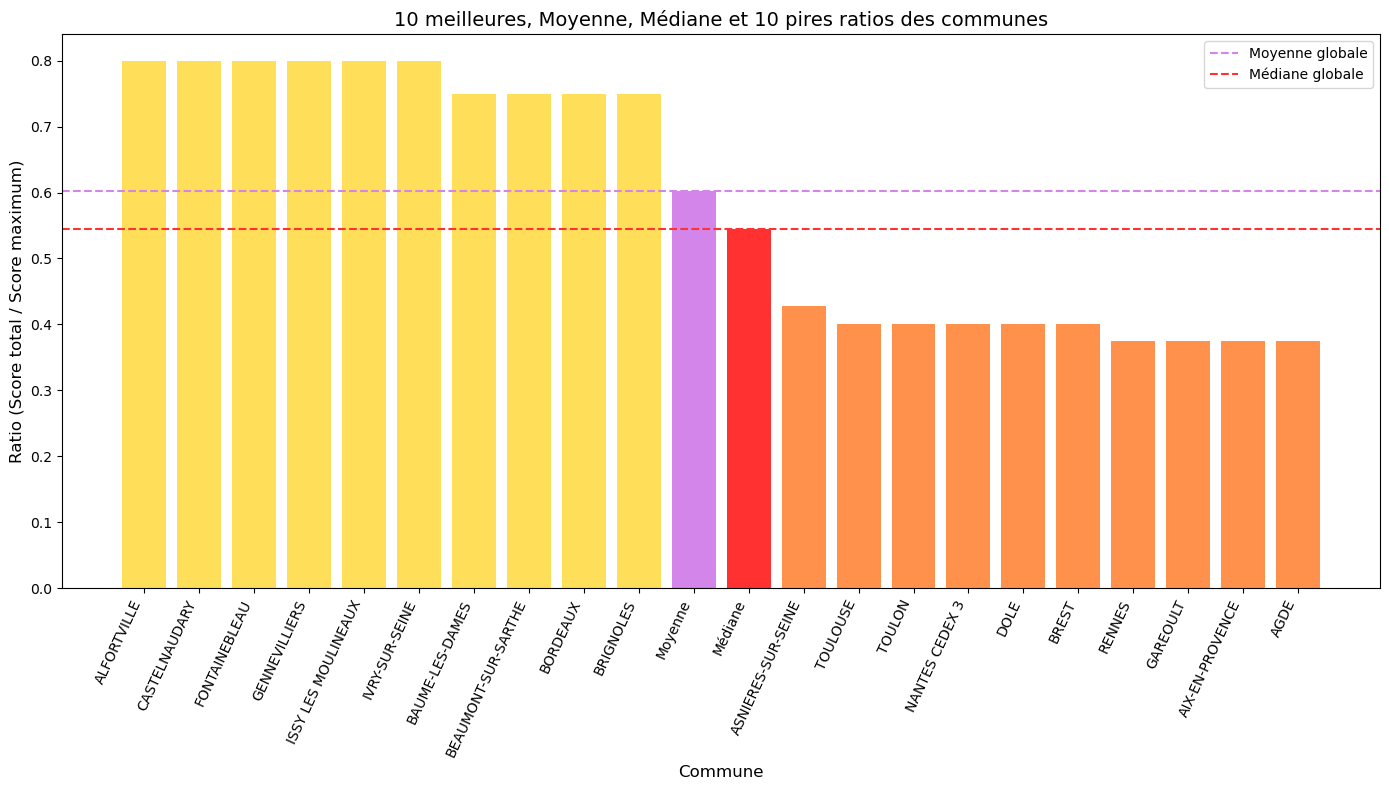

In [127]:
# Calculer la moyenne et la médiane des ratios des communes
moyenne_ratio_communes = scores_localisation["Ratio commune"].mean()
mediane_ratio_communes = scores_localisation["Ratio commune"].median()

# Trouver les top 10 et bottom 10 communes
top_10_communes = scores_localisation.nlargest(10, "Ratio commune")
bottom_10_communes = scores_localisation.nsmallest(10, "Ratio commune")

# Inverser l'ordre des Bottom 10 pour qu'ils soient en ordre décroissant
bottom_10_communes = bottom_10_communes.iloc[::-1]

# Combiner les données pour le graphique
graph_data = pd.DataFrame({
    "Commune": list(top_10_communes["Localisation (Commune)"]) +
               ["Moyenne", "Médiane"] +
               list(bottom_10_communes["Localisation (Commune)"]),
    "Ratio commune": list(top_10_communes["Ratio commune"]) +
                     [moyenne_ratio_communes, mediane_ratio_communes] +
                     list(bottom_10_communes["Ratio commune"])
})

# Tracer le graphique
couleurs = ["#ffde59"] * 10 + ["#d485ea", "#ff3131"] + ["#ff914d"] * 10
plt.figure(figsize=(14, 8))
plt.bar(graph_data["Commune"], graph_data["Ratio commune"], color=couleurs)
plt.title("10 meilleures, Moyenne, Médiane et 10 pires ratios des communes", fontsize=14)
plt.ylabel("Ratio (Score total / Score maximum)", fontsize=12)
plt.xlabel("Commune", fontsize=12)
plt.xticks(rotation=65, fontsize=10, ha="right")
plt.axhline(moyenne_ratio_communes, color="#d485ea", linestyle="--", linewidth=1.5, label="Moyenne globale")
plt.axhline(mediane_ratio_communes, color="#ff3131", linestyle="--", linewidth=1.5, label="Médiane globale")
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

### **2) Score pour chaque contrepartie**

Désormais on calcule le **score total pondéré pour chaque contrepartie.**

En effet pour chaque contrepartie (colonne `Identifiant tiers`) on calcule d'abord pour chaque ligne d'actif les scores. Ensuite on additionne ces scores pour obtenir le score de la contrepartie. 

In [131]:
# Regroupement par contrepartie pour calculer les scores globaux pondérés et maximums
Portefeuille_scores = Portefeuille.groupby("Identifiant tiers").apply(
    lambda group: pd.Series({
        "Score par contrepartie": group["Score de l'actif"].sum(),
        "Score maximum par contrepartie": group["Score maximum de l'actif"].sum(),
    })
).reset_index()

# Ajouter une colonne pour le ratio
Portefeuille_scores["Ratio contrepartie"] = (
    Portefeuille_scores["Score par contrepartie"] / Portefeuille_scores["Score maximum par contrepartie"]
)

# Fusionner les scores avec le DataFrame initial pour ajouter les scores par contrepartie au portefeuille
Portefeuille = Portefeuille.merge(Portefeuille_scores, on="Identifiant tiers", how="left")

# Tri des contreparties pour obtenir les 5 meilleures et les 5 pires selon le ratio
top_5_contreparties = Portefeuille_scores.nlargest(5, "Ratio contrepartie")
bottom_5_contreparties = Portefeuille_scores.nsmallest(5, "Ratio contrepartie")

# Affichage amélioré des Top 5 et Bottom 5
print("\nTop 5 contreparties avec le meilleur ratio score/maximum :")
print(tabulate(top_5_contreparties, headers='keys', tablefmt='fancy_grid'))

print("\nBottom 5 contreparties avec le pire ratio score/maximum :")
print(tabulate(bottom_5_contreparties, headers='keys', tablefmt='fancy_grid'))


Top 5 contreparties avec le meilleur ratio score/maximum :
╒════╤═════════════════════╤══════════════════════════╤══════════════════════════════════╤══════════════════════╕
│    │   Identifiant tiers │   Score par contrepartie │   Score maximum par contrepartie │   Ratio contrepartie │
╞════╪═════════════════════╪══════════════════════════╪══════════════════════════════════╪══════════════════════╡
│ 22 │               42076 │                0.0962117 │                        0.120265  │                  0.8 │
├────┼─────────────────────┼──────────────────────────┼──────────────────────────────────┼──────────────────────┤
│ 23 │               42095 │                0.0128282 │                        0.0160353 │                  0.8 │
├────┼─────────────────────┼──────────────────────────┼──────────────────────────────────┼──────────────────────┤
│ 26 │               42107 │                0.0545199 │                        0.0681499 │                  0.8 │
├────┼─────────────────────┼

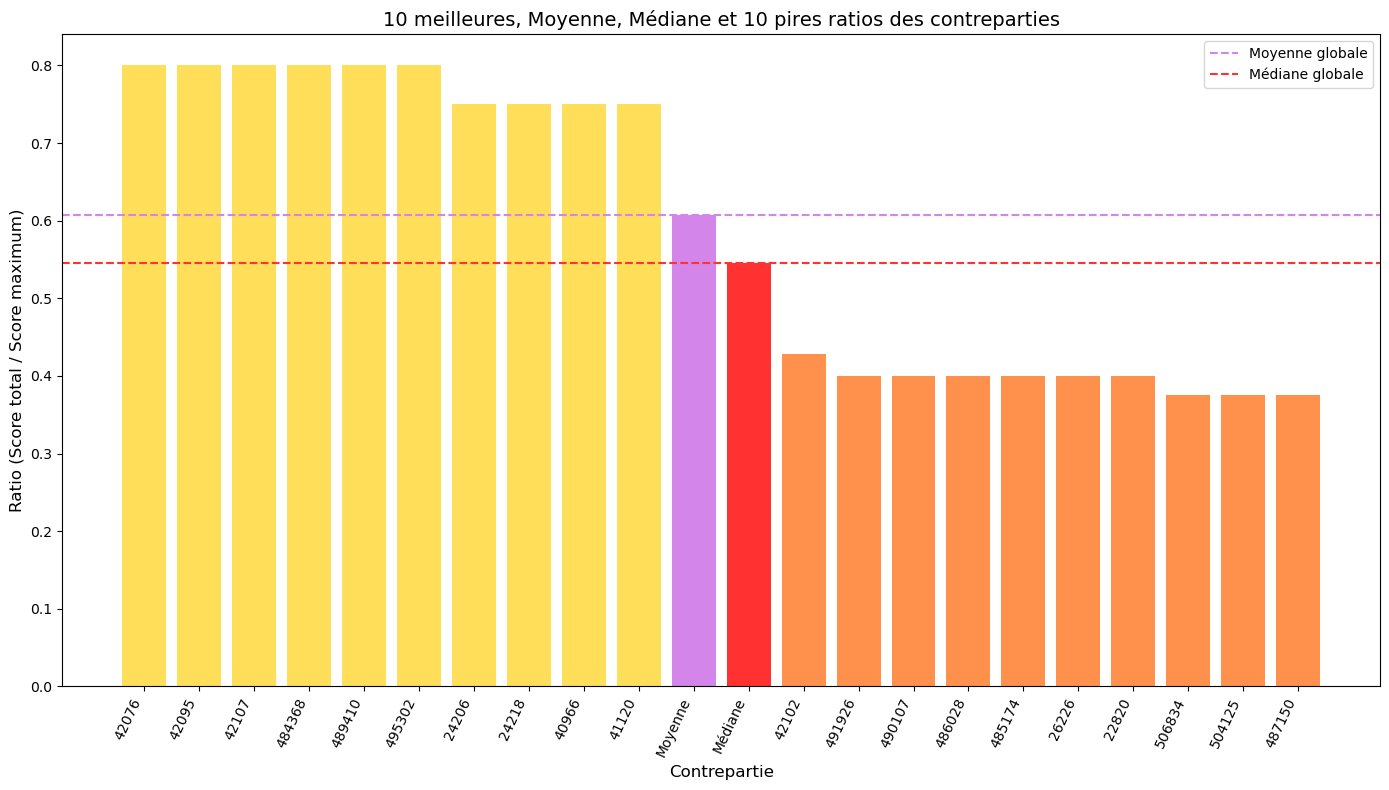

In [133]:
# Calculer la moyenne et la médiane des ratios des contreparties
moyenne_ratio_contreparties = Portefeuille_scores["Ratio contrepartie"].mean()
mediane_ratio_contreparties = Portefeuille_scores["Ratio contrepartie"].median()

# Trouver les 10 meilleures et les 10 pires contreparties
meilleures_10_contreparties = Portefeuille_scores.nlargest(10, "Ratio contrepartie")
pires_10_contreparties = Portefeuille_scores.nsmallest(10, "Ratio contrepartie")

# Inverser l'ordre des 10 pires contreparties pour qu'elles soient en ordre décroissant
pires_10_contreparties = pires_10_contreparties.iloc[::-1]

# Combiner les données pour le graphique
graph_data = pd.DataFrame({
    "Contrepartie": list(meilleures_10_contreparties["Identifiant tiers"]) +
                    ["Moyenne", "Médiane"] +
                    list(pires_10_contreparties["Identifiant tiers"]),
    "Ratio contrepartie": list(meilleures_10_contreparties["Ratio contrepartie"]) +
                          [moyenne_ratio_contreparties, mediane_ratio_contreparties] +
                          list(pires_10_contreparties["Ratio contrepartie"])
})

# Tracer le graphique
couleurs = ["#ffde59"] * 10 + ["#d485ea", "#ff3131"] + ["#ff914d"] * 10
x_positions = range(len(graph_data))
plt.figure(figsize=(14, 8))
plt.bar(x_positions, graph_data["Ratio contrepartie"], color=couleurs)
plt.xticks(x_positions, graph_data["Contrepartie"], rotation=65, fontsize=10, ha="right")
plt.title("10 meilleures, Moyenne, Médiane et 10 pires ratios des contreparties", fontsize=14)
plt.ylabel("Ratio (Score total / Score maximum)", fontsize=12)
plt.xlabel("Contrepartie", fontsize=12)
plt.axhline(moyenne_ratio_contreparties, color="#d485ea", linestyle="--", linewidth=1.5, label="Moyenne globale")
plt.axhline(mediane_ratio_contreparties, color="#ff3131", linestyle="--", linewidth=1.5, label="Médiane globale")
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


In [135]:
# Export du portefeuille mis à jour
Portefeuille.to_excel('Portefeuille_Renseigné_par_contrepartie.xlsx', index=False)
Portefeuille

Identifiant tiers  Localisation (Commune) Localisation (Code INSEE)  \
0               15020   SAINT-MAUR-DES-FOSSES                     94068   
1               15020          VIRY-CHATILLON                     91687   
2               15020  MONTIGNY-LE-BRETONNEUX                     78423   
3               15020               MONTREUIL                     93048   
4               15020               MONTREUIL                     93048   
..                ...                     ...                       ...   
94             484368     ISSY LES MOULINEAUX                     92040   
95             484589     BEAUMONT-SUR-SARTHE                     72029   
96             482926                   SEDAN                     08409   
97             482979       GRESSE-EN-VERCORS                     38186   
98             483256     LES SABLES-D'OLONNE                     85194   

    Secteur d'activité (code NACE 2)  Maturité du prêt  Encours (million EUR)  \
0                                 68              2099                     59   
1                                 68              2062                     26   
2                                 68              2030                     99   
3                                 68              2084                     28   
4                                 68              2088                     49   
..                               ...               ...                    ...   
94                                41              2050                     53   
95                                86              2071                     25   
96                                86              2046                     22   
97                                49              2037                     12   
98                                84              2096                     84   

    Sécheresse  Inondations  Feux de forêts  Vagues de chaleur  \
0            0            2               1                  1   
1            0            2               1                  1   
2            0            2               1                  1   
3            0            2               1                  1   
4            0            2               1                  1   
..         ...          ...             ...                ...   
94           0            2               0                  2   
95           1            2               0                  2   
96           1            2               0                  2   
97           1            2               1                  1   
98           1            2               1                  1   

    Score de l'actif  Score maximum de l'actif  Ratio actif  \
0           0.070956                  0.130086     0.545455   
1           0.031269                  0.057326     0.545455   
2           0.119062                  0.218280     0.545455   
3           0.033674                  0.061736     0.545455   
4           0.058930                  0.108038     0.545455   
..               ...                       ...          ...   
94          0.084987                  0.106234     0.800000   
95          0.045099                  0.060132     0.750000   
96          0.039687                  0.052916     0.750000   
97          0.016837                  0.031269     0.538462   
98          0.117859                  0.218882     0.538462   

    Score total de la commune  Score maximum total de la commune  \
0                    0.070956                           0.130086   
1                    0.092604                           0.169774   
2                    0.119062                           0.218280   
3                    0.092604                           0.169774   
4                    0.092604                           0.169774   
..                        ...                                ...   
94                   0.084987                           0.106234   
95                   0.045099       

### **3) Score du portefeuille**

Désormais on calcule **le score total du portefeuille**

In [139]:
# Calcul du score global du portefeuille
score_global = Portefeuille["Score de l'actif"].sum()

# Calcul du score global maximal du portefeuille
score_global_maximal = Portefeuille["Score maximum de l'actif"].sum()

# Création d'un tableau pour afficher les scores globaux
scores_global_table = [
    {"Type de score": "Score global du portefeuille", "Valeur": score_global},
    {"Type de score": "Score global maximal du portefeuille", "Valeur": score_global_maximal},
]

# Affichage des résultats sous forme de tableau
print("\nScores globaux du portefeuille :")
print(tabulate(scores_global_table, headers="keys", tablefmt="fancy_grid"))



Scores globaux du portefeuille :
╒══════════════════════════════════════╤══════════╕
│ Type de score                        │   Valeur │
╞══════════════════════════════════════╪══════════╡
│ Score global du portefeuille         │  6.50471 │
├──────────────────────────────────────┼──────────┤
│ Score global maximal du portefeuille │ 10.9908  │
╘══════════════════════════════════════╧══════════╛


### **Étude des contributions moyennes des types de risques**

Dans cette section, nous allons examiner les contributions moyennes des différents aléas au sein du portefeuille.

Pour cela, nous calculons la moyenne des scores pour chaque aléa et visualisons ces résultats sous forme d’un graphique en barres.


Tableau des scores moyens par type de risque :
╒════╤═══════════════════╤═══════════════╕
│    │ Type de risque    │   Score moyen │
╞════╪═══════════════════╪═══════════════╡
│  0 │ Sécheresse        │      0.79798  │
├────┼───────────────────┼───────────────┤
│  1 │ Inondations       │      1.76768  │
├────┼───────────────────┼───────────────┤
│  2 │ Feux de forêts    │      0.555556 │
├────┼───────────────────┼───────────────┤
│  3 │ Vagues de chaleur │      1.24242  │
╘════╧═══════════════════╧═══════════════╛


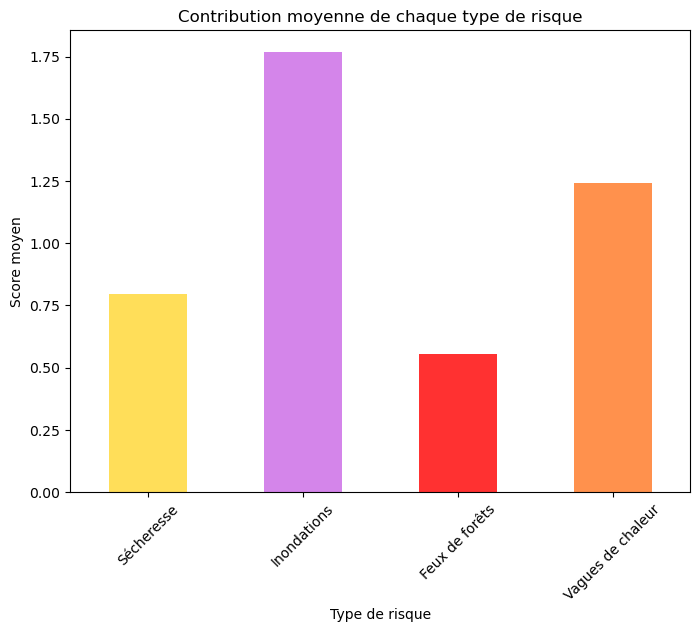

In [142]:
# Colonnes représentant les types de risques
colonnes_risques = ["Sécheresse", "Inondations", "Feux de forêts", "Vagues de chaleur"]

# Calculer la moyenne des scores pour chaque type de risque
moyennes_risques = Portefeuille[colonnes_risques].mean()

# Afficher les valeurs sous forme de tableau
tableau_risques = moyennes_risques.reset_index()
tableau_risques.columns = ["Type de risque", "Score moyen"]
print("\nTableau des scores moyens par type de risque :")
print(tabulate(tableau_risques, headers="keys", tablefmt="fancy_grid"))

# Couleurs pour chaque type de risque
couleurs_risques = ["#ffde59", "#d485ea", "#ff3131", "#ff914d"]

# Tracer un graphique en barres pour les moyennes des contributions de chaque type de risque
plt.figure(figsize=(8, 6))
moyennes_risques.plot(kind='bar', color=couleurs_risques)
plt.title("Contribution moyenne de chaque type de risque")
plt.ylabel("Score moyen")
plt.xlabel("Type de risque")
plt.xticks(rotation=45)
plt.show()

### **Analyse des scores de risque par secteur d'activité**

Dans cette section, nous analysons comment les ratios de risque varient en fonction des secteurs d'activité.
Nous utilisons un boxplot pour visualiser la distribution des scores au sein de chaque secteur.

L'objectif est de repérer les secteurs avec le risque élevé ou une variabilité importante.

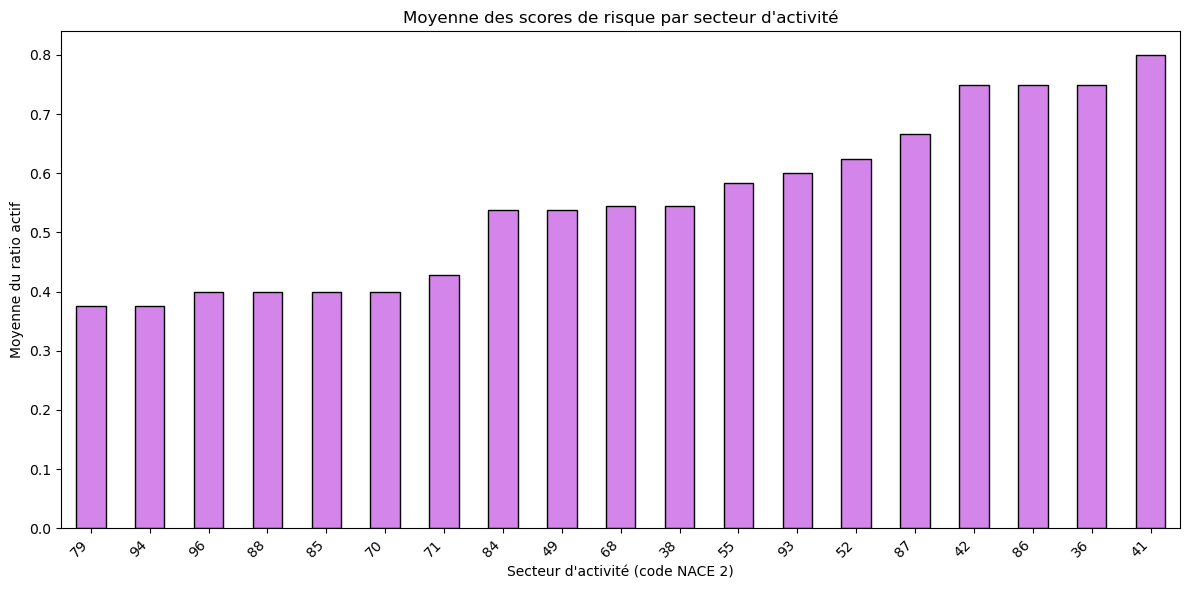

In [145]:
import matplotlib.pyplot as plt

# Calculer les moyennes des ratios de risque par secteur
mean_ratios = Portefeuille.groupby("Secteur d'activité (code NACE 2)")["Ratio actif"].mean().sort_values()

# Tracer un graphique en barres
plt.figure(figsize=(12, 6))
mean_ratios.plot(kind='bar', color="#d485ea", edgecolor="black")
plt.title("Moyenne des scores de risque par secteur d'activité")
plt.xlabel("Secteur d'activité (code NACE 2)")
plt.ylabel("Moyenne du ratio actif")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### **Analyse des scores de risque par localisation**

Dans cette section, nous analysons comment les scores totaux et les ratios de risque varient en fonction de la localisation (commune).

Nous avons généré deux cartes pour visualiser ces variations :
- Carte 1 : Score total de risque par commune – Identifie les communes avec une concentration élevée de risques en sommant les scores des actifs localisés dans chaque commune.
- Carte 2 : Ratio de risque par commune – Met en évidence les communes où les actifs présentent une exposition relative importante, en utilisant le ratio des scores.

Ces visualisations permettent de repérer :
- Les communes présentant un risque global élevé, nécessitant une gestion prioritaire.
- Les communes avec des ratios de risque élevés, reflétant des zones particulièrement vulnérables à des aléas climatiques spécifiques.

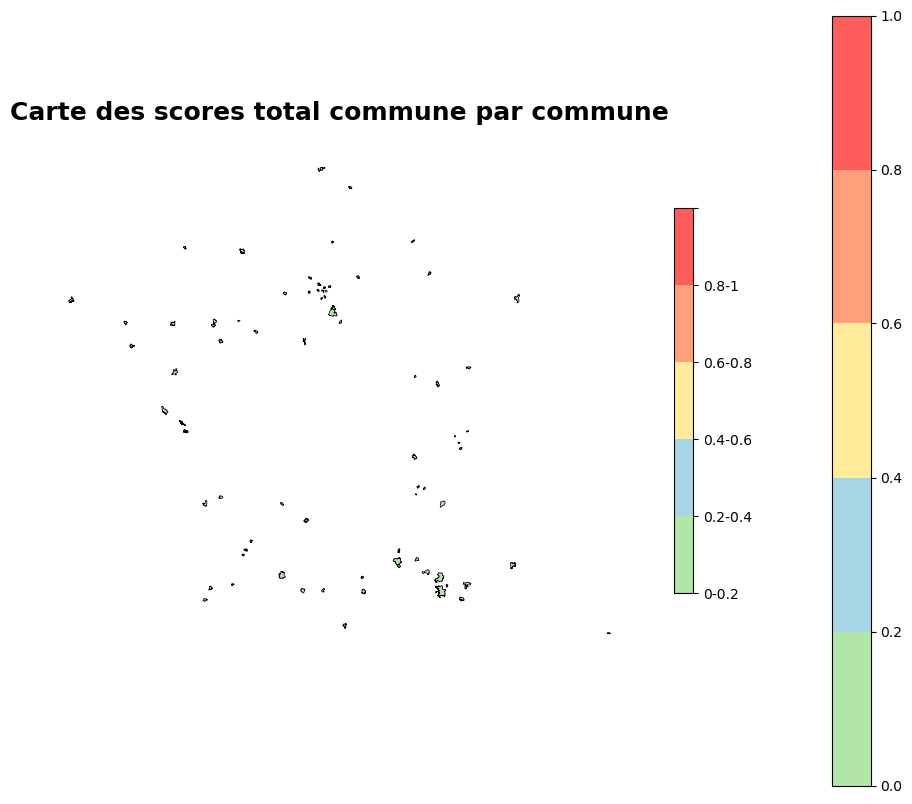

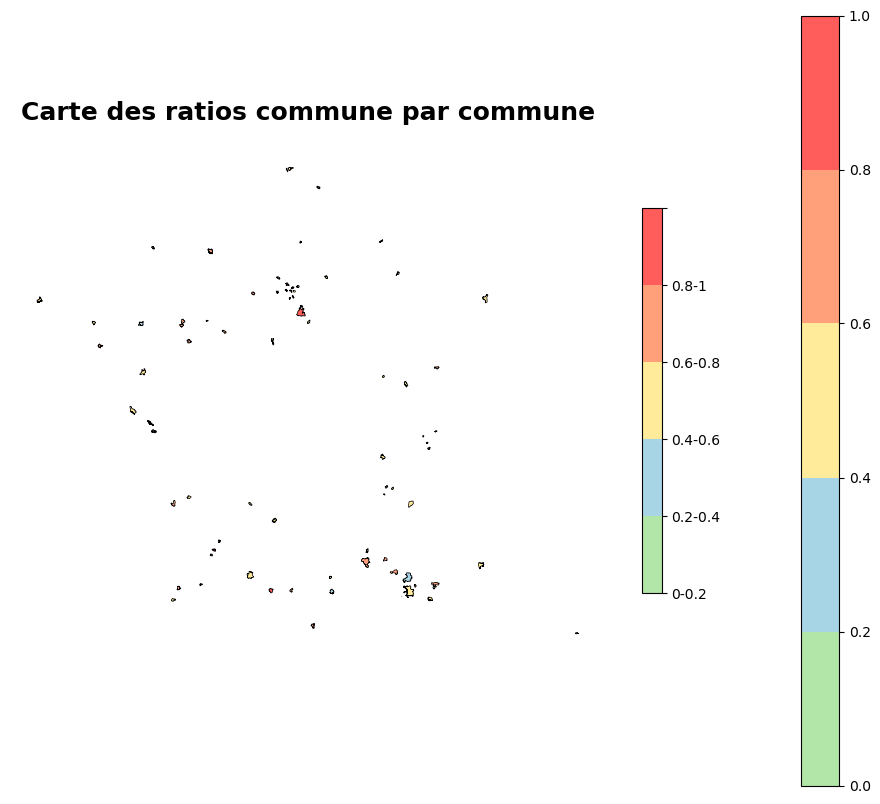

In [155]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import matplotlib.colors as mcolors

# Fonction pour tracer la carte des scores de risque avec des couleurs personnalisées
def plot_risk_score_map(risk_type, commune_map, title):
    # Gérer les valeurs manquantes en les remplissant avec 0 (communes sans actifs)
    commune_map[risk_type] = commune_map[risk_type].fillna(0)
    
    # Définir les couleurs et les limites des plages
    colors = ["#b2e5a8", "#a8d5e5", "#ffeb99", "#ffa07a", "#ff5c5c"]  # Vert pastel, bleu pastel, jaune, orange, rouge
    bounds = [0, 0.2, 0.4, 0.6, 0.8, 1]
    cmap = ListedColormap(colors)
    norm = BoundaryNorm(bounds, cmap.N)

    # Tracer la carte avec les couleurs personnalisées
    fig, ax = plt.subplots(figsize=(12, 10))  # Fixer une taille plus grande pour la figure
    commune_map.plot(
        column=risk_type, 
        cmap=cmap, 
        linewidth=0.5, 
        ax=ax, 
        edgecolor='black',  # Couleurs de bordures plus visibles
        legend=True, 
        norm=norm
    )
    
    # Ajouter une barre de légende adaptée
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, boundaries=bounds, ticks=bounds, shrink=0.5)
    cbar.ax.set_yticklabels(["0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1", ""])

    # Ajouter un titre et ajuster sa taille
    plt.title(title, fontsize=18, fontweight='bold')
    plt.axis('off')
    plt.show()

# Charger les données géographiques et les fusionner avec le portefeuille
commune_map = gpd.read_file("qgis/COMMUNE.shp")
commune_map["INSEE_COM"] = commune_map["INSEE_COM"].astype(str)
Portefeuille["Localisation (Code INSEE)"] = Portefeuille["Localisation (Code INSEE)"].astype(str)
commune_map = commune_map.merge(Portefeuille, left_on="INSEE_COM", right_on="Localisation (Code INSEE)")

# 1. Carte avec la somme des scores de risque (Score total de la commune)
plot_risk_score_map("Score total de la commune", commune_map, "Carte des scores total commune par commune")

# 2. Carte avec le ratio des scores de risque (Ratio de la commune)
plot_risk_score_map("Ratio commune", commune_map, "Carte des ratios commune par commune")
